In [1]:
import importlib.util
import numpy as np
from scipy.constants import c
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

In [2]:
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)

interApi = lumapi.INTERCONNECT(hide = False)

In [3]:
interApi.expressioncheckoff()

In [4]:
um = 1e-6
nm = 1e-9
valor_lambda = 1550*nm
start_wavelenth = 1500*nm
stop_wavelenth = 1600*nm
number_point = 100000

neff = 2.35317

file = 'Analise_Monte_Carlo'

In [5]:
interApi.save(file)

In [6]:
coupling_length_05 = 17.5*um

In [7]:
coupling_length_029 = 11.5*um
coupling_length_008 = 4*um

In [8]:
ng = 4.3458796
esp = [50/nm, 100/nm, 200/nm]

FSR = np.zeros(len(esp))

L1 = 25*um
L2 = np.zeros((len(FSR),7))

d_L = np.zeros((len(FSR),7))

for i in range (len(FSR)):
    FSR[i] = valor_lambda**2/(c/esp[i])

    d_L_base = valor_lambda**2/(2*FSR[i]*ng)
    d_L_FS = valor_lambda/neff
    
    d_L_3 =  d_L_base
    d_L_2A = d_L_base/2
    d_L_2B = d_L_base/2 + 0.75*d_L_FS
    d_L_1A = d_L_base/4
    d_L_1B = d_L_base/4 + 0.250*d_L_FS
    d_L_1C = d_L_base/4 + 0.125*d_L_FS
    d_L_1D = d_L_base/4 + 0.375*d_L_FS

    d_L[i] = [d_L_3, d_L_2A, d_L_2B, d_L_1A, d_L_1B, d_L_1C, d_L_1D]

    for j in range (7):
        L2[i][j] = L1 + d_L[i][j]

    print(f'Para um espaçamento de {esp[i]*nm:.0f} GHz, FSR = {FSR[i]/nm:.2f} nm:')
    print(F'\u0394L_EST1 = {d_L[i][0]/um:.2f} \u03BCm')
    print(F'Comprimento maior EST1-1 = {L2[i][0]/um:.2f} \u03BCm e Comprimento maior EST1-2 = {(L2[i][0]+d_L[i][0])/um:.2f} \u03BCm\n')
    print(F'\u0394L_EST2A = {d_L[i][1]/um:.2f} \u03BCm e \u0394L_EST2B = {d_L[i][2]/um:.2f} \u03BCm')
    print(F'Comprimento maior EST2A-1 = {L2[i][1]/um:.2f} \u03BCm e Comprimento maior EST2A-2 = {(L2[i][1]+d_L[i][1])/um:.2f} \u03BCm')
    print(F'Comprimento maior EST2B-1 = {L2[i][2]/um:.2f} \u03BCm e Comprimento maior EST2B-2 = {(L2[i][2]+d_L[i][2])/um:.2f} \u03BCm\n')
    print(F'\u0394L_EST3A = {d_L[i][3]/um:.2f} \u03BCm, \u0394L_EST3B = {d_L[i][4]/um:.2f} \u03BCm, \u0394L_EST3C = {d_L[i][5]/um:.2f} \u03BCm e \u0394L_EST3D = {d_L[i][6]/um:.2f} \u03BCm')
    print(F'Comprimento maior EST3A-1 = {L2[i][3]/um:.2f} \u03BCm e Comprimento maior EST3A-2 = {(L2[i][3]+d_L[i][3])/um:.2f} \u03BCm')
    print(F'Comprimento maior EST3B-1 = {L2[i][4]/um:.2f} \u03BCm e Comprimento maior EST3B-2 = {(L2[i][4]+d_L[i][4])/um:.2f} \u03BCm')
    print(F'Comprimento maior EST3C-1 = {L2[i][5]/um:.2f} \u03BCm e Comprimento maior EST3C-2 = {(L2[i][5]+d_L[i][5])/um:.2f} \u03BCm')
    print(F'Comprimento maior EST3D-1 = {L2[i][6]/um:.2f} \u03BCm e Comprimento maior EST3D-2 = {(L2[i][6]+d_L[i][6])/um:.2f} \u03BCm')
    print(F'Comprimento menor = {L1/um:.2f} \u03BCm\n')

Para um espaçamento de 50 GHz, FSR = 0.40 nm:
ΔL_EST1 = 689.83 μm
Comprimento maior EST1-1 = 714.83 μm e Comprimento maior EST1-2 = 1404.66 μm

ΔL_EST2A = 344.92 μm e ΔL_EST2B = 345.41 μm
Comprimento maior EST2A-1 = 369.92 μm e Comprimento maior EST2A-2 = 714.83 μm
Comprimento maior EST2B-1 = 370.41 μm e Comprimento maior EST2B-2 = 715.82 μm

ΔL_EST3A = 172.46 μm, ΔL_EST3B = 172.62 μm, ΔL_EST3C = 172.54 μm e ΔL_EST3D = 172.70 μm
Comprimento maior EST3A-1 = 197.46 μm e Comprimento maior EST3A-2 = 369.92 μm
Comprimento maior EST3B-1 = 197.62 μm e Comprimento maior EST3B-2 = 370.25 μm
Comprimento maior EST3C-1 = 197.54 μm e Comprimento maior EST3C-2 = 370.08 μm
Comprimento maior EST3D-1 = 197.70 μm e Comprimento maior EST3D-2 = 370.41 μm
Comprimento menor = 25.00 μm

Para um espaçamento de 100 GHz, FSR = 0.80 nm:
ΔL_EST1 = 344.92 μm
Comprimento maior EST1-1 = 369.92 μm e Comprimento maior EST1-2 = 714.83 μm

ΔL_EST2A = 172.46 μm e ΔL_EST2B = 172.95 μm
Comprimento maior EST2A-1 = 197.46 μm

In [9]:
x_ona = 3500
y_ona = -1000

x_waveguide_maior = 25
y_waveguide_maior = 150

x_waveguide_menor = 25
y_waveguide_menor = 300

x_y_branch = -150
y_y_branch = 225

x_acoplador_direcional = 300
y_acoplador_direcional = 225

distancia = 450
distancia_y = 75

In [10]:
interApi.switchtolayout()

interApi.select('Acoplador_Direcional_in')
interApi.delete()

interApi.addelement('ebeam_dc_te1550')
interApi.set('name', 'Acoplador_Direcional_in')
interApi.set('coupling_length', coupling_length_05)
interApi.setposition('Acoplador_Direcional_in', x_y_branch, y_y_branch)

In [126]:
interApi.switchtolayout()

for i in range (2):

    interApi.select(f'WGD_maior_{i+1}')
    interApi.delete()
    interApi.select(f'WGD_menor_{i+1}')
    interApi.delete()

    interApi.addelement('ebeam_wg_integral_1550')
    interApi.set('name', f'WGD_maior_{i+1}')
    interApi.setposition(f'WGD_maior_{i+1}', interApi.getnamed('Acoplador_Direcional_in','x position')+(2*i+1)*distancia/2, interApi.getnamed('Acoplador_Direcional_in','y position') + ((-1)**(i+1))*distancia_y)
    interApi.set('wg_length', L2[0][0] + i*d_L[0][0])

    interApi.addelement('ebeam_wg_integral_1550')
    interApi.set('name', f'WGD_menor_{i+1}')
    interApi.setposition(f'WGD_menor_{i+1}', interApi.getnamed('Acoplador_Direcional_in','x position')+(2*i+1)*distancia/2, interApi.getnamed('Acoplador_Direcional_in','y position') - ((-1)**(i+1))*distancia_y)
    interApi.set('wg_length', L1)

In [127]:
interApi.switchtolayout()

for i in range (2):
    interApi.select(f'Acoplador_Direcional_{i+1}')
    interApi.delete()

    interApi.addelement('ebeam_dc_te1550')
    interApi.set('name', f'Acoplador_Direcional_{i+1}')
    if i+1 == 1:
        interApi.set('coupling_length', coupling_length_029)
    else:
        interApi.set('coupling_length', coupling_length_008)
    interApi.setposition(f'Acoplador_Direcional_{i+1}', interApi.getnamed('Acoplador_Direcional_in','x position')+(i+1)*distancia, y_acoplador_direcional)

In [128]:
interApi.switchtolayout()

interApi.select('ONA')
interApi.delete()

interApi.addelement('Optical Network Analyzer')
interApi.set('name', 'ONA')
interApi.setposition('ONA', x_ona, y_ona)
interApi.set('number of input ports', 2)
interApi.set('input parameter', 'start and stop')
interApi.set('start frequency', c/start_wavelenth)
interApi.set('stop frequency', c/stop_wavelenth)
interApi.set('number of points', number_point)
interApi.setnamed('ONA', 'Rotated', 45)

In [129]:
interApi.connect('ONA', 'output', 'Acoplador_Direcional_in', 'opt_2')
interApi.connect('Acoplador_Direcional_in', 'opt_3', f'WGD_maior_1', 'port 1')
interApi.connect('Acoplador_Direcional_in', 'opt_4', f'WGD_menor_1', 'port 1')

for i in range (1):
    interApi.connect(f'WGD_maior_{i+1}', 'port 2', f'Acoplador_Direcional_{i+1}', 'opt_1')
    interApi.connect(f'WGD_menor_{i+1}', 'port 2', f'Acoplador_Direcional_{i+1}', 'opt_2')
    interApi.connect(f'Acoplador_Direcional_{i+1}', 'opt_4', f'WGD_maior_{i+2}', 'port 1')
    interApi.connect(f'Acoplador_Direcional_{i+1}', 'opt_3', f'WGD_menor_{i+2}', 'port 1')
    interApi.connect(f'WGD_maior_{i+2}', 'port 2', f'Acoplador_Direcional_{i+2}', 'opt_2')
    interApi.connect(f'WGD_menor_{i+2}', 'port 2', f'Acoplador_Direcional_{i+2}', 'opt_1')
    interApi.connect(f'Acoplador_Direcional_{i+2}', 'opt_3', 'ONA', f'input {i+1}')
    interApi.connect(f'Acoplador_Direcional_{i+2}', 'opt_4', 'ONA', f'input {i+2}')

In [130]:
interApi.save(file)

In [131]:
interApi.run(1)

In [132]:
FSR_GAIN = [None]*2
wavelength_GAIN = [None]*2
transmission_GAIN = [None]*2

for i in range (2):
    FSR_GAIN[i] = interApi.getresult('ONA', f'input {i+1}/mode 1/gain')

    wavelength_GAIN[i] = np.array(FSR_GAIN[i]['wavelength']).flatten()
    transmission_GAIN[i] = np.array(FSR_GAIN[i]["'TE' gain (dB)"])

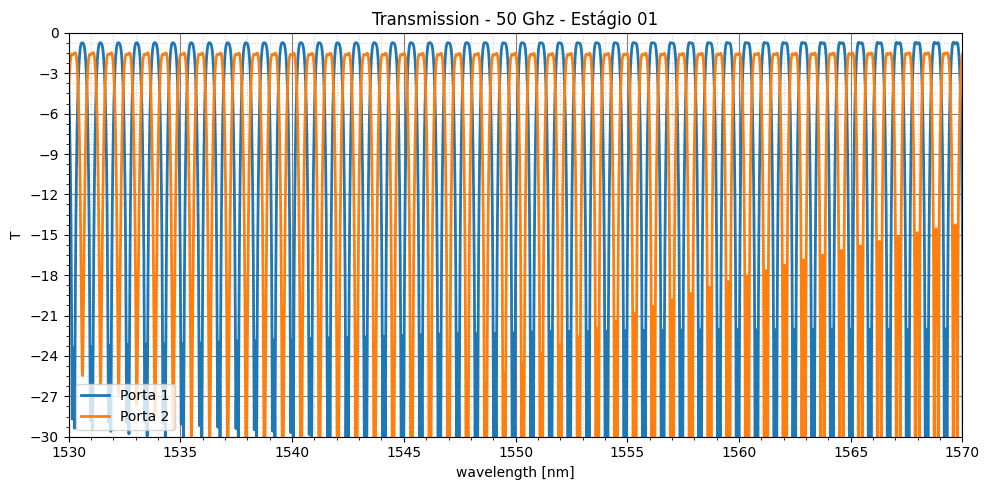

In [133]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

for i in range(2):
    plt.plot((wavelength_GAIN[i]/nm), transmission_GAIN[i], label = f'Porta {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 50 Ghz - Estágio 01')
plt.legend(loc='lower left')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 50 Ghz - Estagio 01.png')
plt.show()

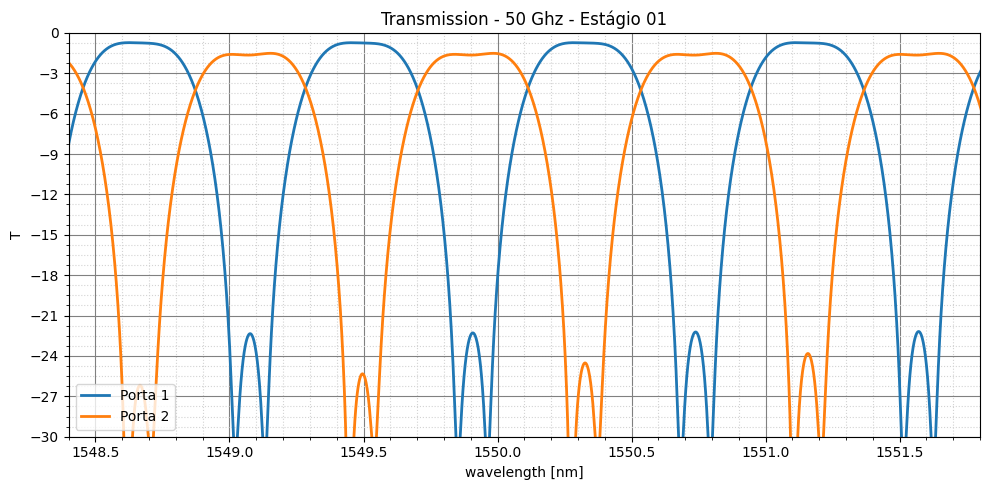

In [134]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

for i in range(2):
    plt.plot((wavelength_GAIN[i]/nm), transmission_GAIN[i], label = f'Porta {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+18.4, (stop_wavelenth/nm)-30-18.2])
plt.ylim([-30, 0])
plt.title(r'Transmission - 50 Ghz - Estágio 01')
plt.legend(loc='lower left')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 50 Ghz - Estagio 01 - zoom.png')
plt.show()

Otmização Monte Carlo

In [135]:
MC_name = "MC_script_DC_50"
interApi.deletesweep(MC_name)

interApi.addsweep(2)

interApi.setsweep("Monte Carlo analysis", "name", MC_name)
interApi.setsweep(MC_name, "number of trials", 50)
interApi.setsweep(MC_name, "batch size", 50)
interApi.setsweep(MC_name, "enable seed", 1)
interApi.setsweep(MC_name, "seed", 1)
interApi.setsweep(MC_name, "Variation", "Both")

1.0

In [136]:
interApi.setsweep(MC_name, "type", "Parameters")

param05 = {
    "Name": "cpl_0.5",
    "Parameter": "::Root Element::Acoplador_Direcional_in::coupling_length",
    "Value": interApi.getnamed("Acoplador_Direcional_in", "coupling_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.02*interApi.getnamed("Acoplador_Direcional_in", "coupling_length")
    }
}

param029 = {
    "Name": "cpl_0.29",
    "Parameter": "::Root Element::Acoplador_Direcional_1::coupling_length",
    "Value": interApi.getnamed("Acoplador_Direcional_1", "coupling_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.02*interApi.getnamed("Acoplador_Direcional_1", "coupling_length")
    }
}

param008 = {
    "Name": "cpl_0.08",
    "Parameter": "::Root Element::Acoplador_Direcional_2::coupling_length",
    "Value": interApi.getnamed("Acoplador_Direcional_2", "coupling_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.02*interApi.getnamed("Acoplador_Direcional_2", "coupling_length")
    }
}

interApi.addsweepparameter(MC_name, param05)
interApi.addsweepparameter(MC_name, param029)
interApi.addsweepparameter(MC_name, param008)

'cpl_0.08'

In [137]:
result_gain_1 = {
    "Name": "gain_out_1",
    "Result": "::Root Element::ONA::input 1/mode 1/gain",
    "Estimation": True
}

result_gain_2 = {
    "Name": "gain_out_2",
    "Result": "::Root Element::ONA::input 2/mode 1/gain",
    "Estimation": True
}

interApi.addsweepresult(MC_name, result_gain_1)
interApi.addsweepresult(MC_name, result_gain_2)

'gain_out_2'

In [138]:
interApi.runsweep(MC_name)

In [139]:
histo_05 = pd.read_csv('Histograma_0.5_50.txt', skiprows=3, names=['cpl_0.5', 'count'])
histo_029 = pd.read_csv('Histograma_0.29_50.txt', skiprows=3, names=['cpl_0.29', 'count'])
histo_008 = pd.read_csv('Histograma_0.08_50.txt', skiprows=3, names=['cpl_0.29', 'count'])

valores_05 = histo_05['cpl_0.5'].to_numpy()
count_05 = histo_05['count'].to_numpy()

valores_029 = histo_029['cpl_0.29'].to_numpy()
count_029 = histo_029['count'].to_numpy()

valores_008 = histo_008['cpl_0.29'].to_numpy()
count_008 = histo_008['count'].to_numpy()

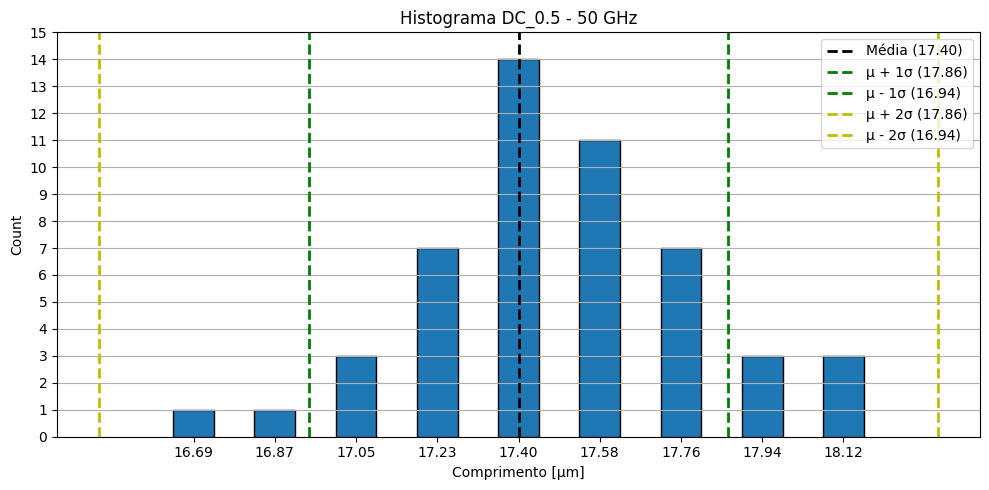

In [140]:
espacamento= np.min(np.diff(valores_05))*0.5

media = np.mean(valores_05)
desvio_padrao = np.std(valores_05)

plt.figure(figsize=(10, 5))
plt.bar(valores_05, count_05, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_05))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_05]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_05)+1,num=max(count_05)+2))
plt.ylabel('Count')
plt.title('Histograma DC_0.5 - 50 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

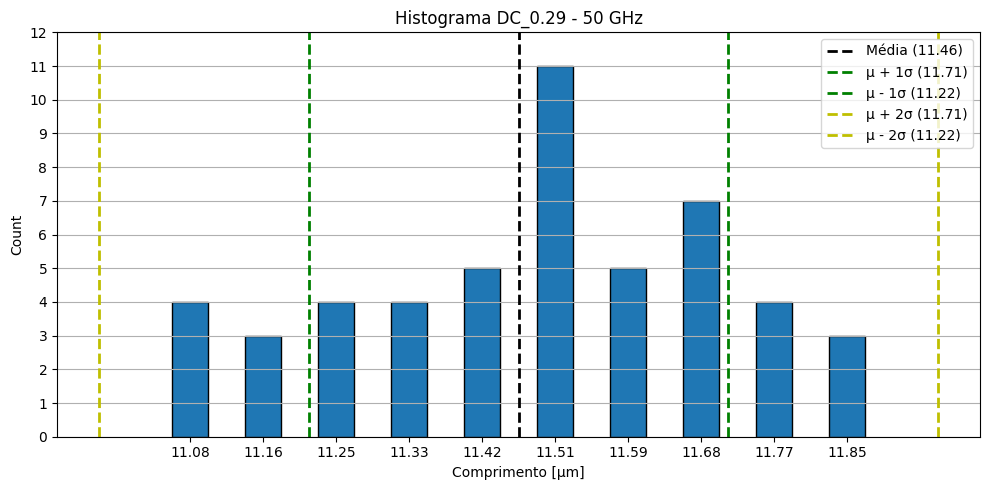

In [141]:
espacamento= np.min(np.diff(valores_029))*0.5

media = np.mean(valores_029)
desvio_padrao = np.std(valores_029)

plt.figure(figsize=(10, 5))
plt.bar(valores_029, count_029, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_029))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_029]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.ylabel('Count')
plt.yticks(np.linspace(0,max(count_029)+1,num=max(count_029)+2))
plt.title('Histograma DC_0.29 - 50 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

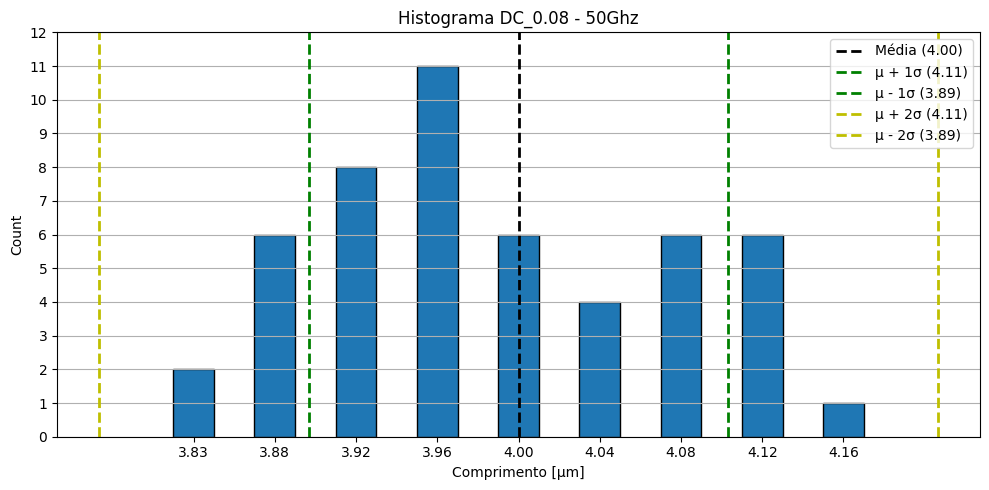

In [142]:
espacamento= np.min(np.diff(valores_008))*0.5

media = np.mean(valores_008)
desvio_padrao = np.std(valores_008)

plt.figure(figsize=(10, 5))
plt.bar(valores_008, count_008, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_008))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_008]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.ylabel('Count')
plt.yticks(np.linspace(0,max(count_008)+1,num=max(count_008)+2))
plt.title('Histograma DC_0.08 - 50Ghz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

In [143]:
interApi.setsweep(MC_name, "number of trials", 5)
interApi.setsweep(MC_name, "batch size", 5)

1.0

In [144]:
interApi.runsweep(MC_name)

In [145]:
result_data_1 = interApi.getsweepresult(MC_name, "gain_out_1")
result_data_2 = interApi.getsweepresult(MC_name, "gain_out_2")

wavelengths_1 = result_data_1["wavelength"].flatten()
gain_db_1 = result_data_1["'TE' gain (dB)"]
wavelengths_2 = result_data_2["wavelength"].flatten()
gain_db_2 = result_data_2["'TE' gain (dB)"]

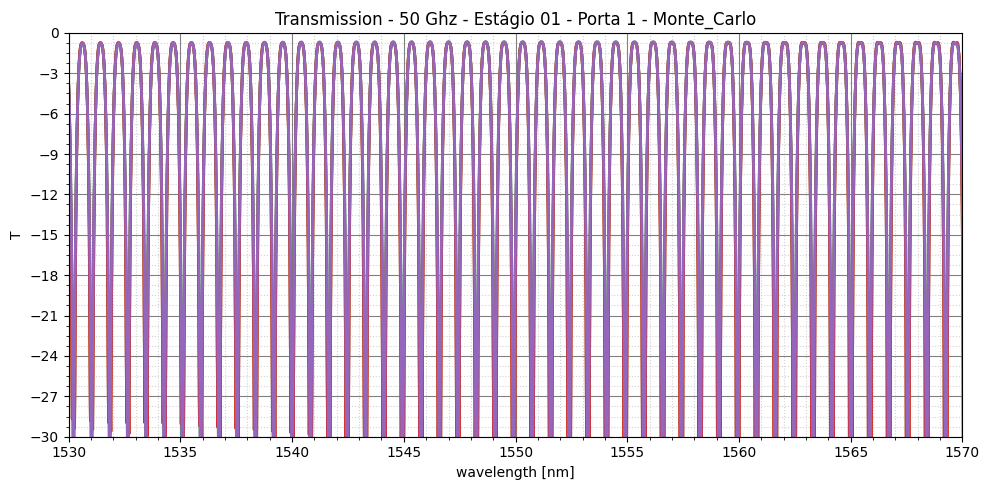

In [146]:
fig11 = plt.figure(figsize=(10,5))
ax11 = fig11.add_subplot(111)

plt.plot(wavelengths_1/nm, gain_db_1, linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 50 Ghz - Estágio 01 - Porta 1 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.show()

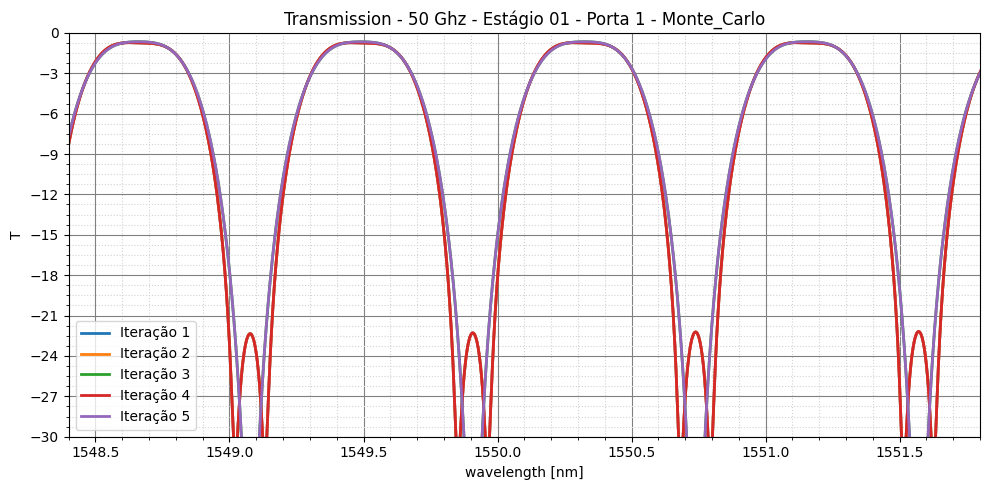

In [147]:
fig11 = plt.figure(figsize=(10,5))
ax11 = fig11.add_subplot(111)

for i in range (5):
    plt.plot(wavelengths_1/nm, gain_db_1[:,i], label = f'Iteração {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+18.4, (stop_wavelenth/nm)-30-18.2])
plt.ylim([-30, 0])
plt.title(r'Transmission - 50 Ghz - Estágio 01 - Porta 1 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))
plt.legend()
plt.minorticks_on()

plt.tight_layout()
plt.show()

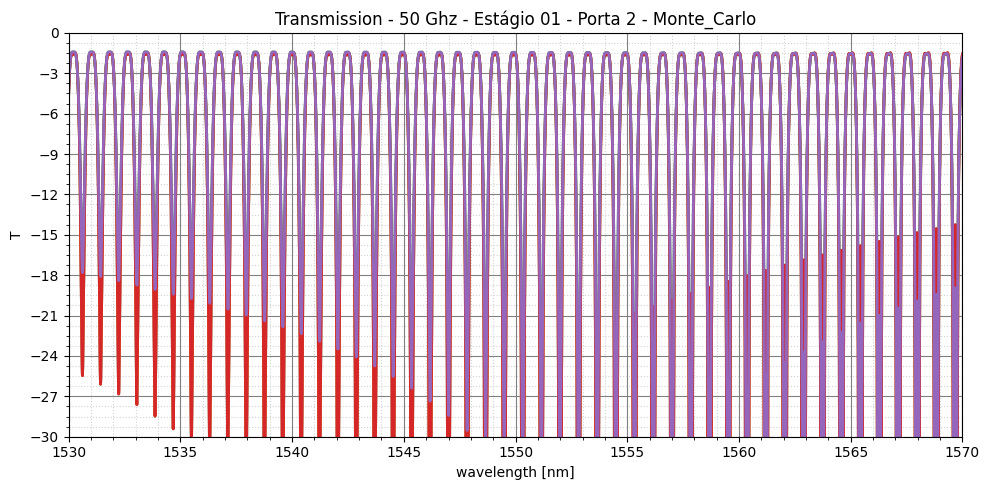

In [148]:
fig12 = plt.figure(figsize=(10,5))
ax12 = fig12.add_subplot(111)

plt.plot(wavelengths_2/nm, gain_db_2, linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 50 Ghz - Estágio 01 - Porta 2 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.show()

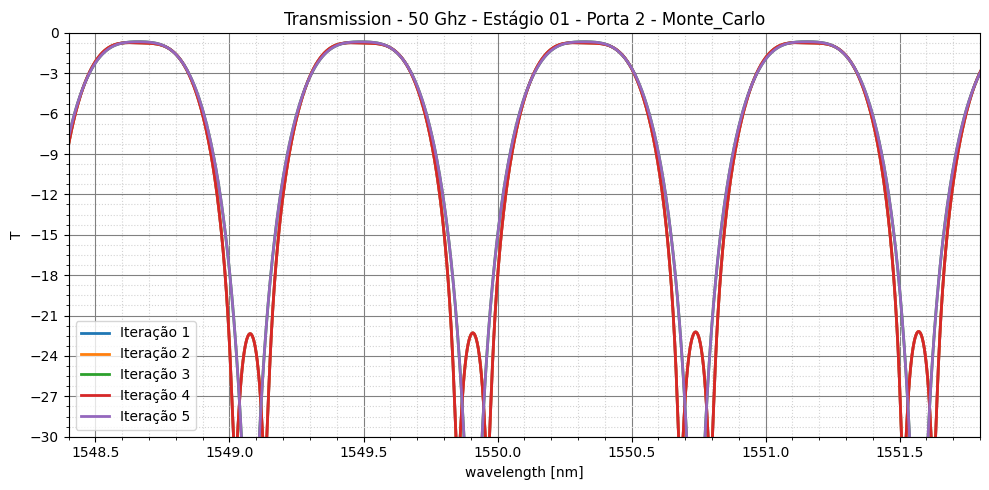

In [149]:
fig12 = plt.figure(figsize=(10,5))
ax12 = fig12.add_subplot(111)

for i in range (5):
    plt.plot(wavelengths_1/nm, gain_db_1[:,i], label = f'Iteração {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+18.4, (stop_wavelenth/nm)-30-18.2])
plt.ylim([-30, 0])
plt.title(r'Transmission - 50 Ghz - Estágio 01 - Porta 2 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))
plt.legend()
plt.minorticks_on()

plt.tight_layout()
plt.show()

In [39]:
MC_name = "MC_script_WG_50"
interApi.deletesweep(MC_name)

interApi.addsweep(2)

interApi.setsweep("Monte Carlo analysis", "name", MC_name)
interApi.setsweep(MC_name, "number of trials", 50)
interApi.setsweep(MC_name, "batch size", 50)
interApi.setsweep(MC_name, "enable seed", 1)
interApi.setsweep(MC_name, "seed", 1)
interApi.setsweep(MC_name, "Variation", "Both")

1.0

In [43]:
interApi.setsweep(MC_name, "type", "Parameters")

param1 = {
    "Name": "wg_1",
    "Parameter": "::Root Element::WGD_maior_1::wg_length",
    "Value": interApi.getnamed("WGD_maior_1", "wg_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.005*interApi.getnamed("WGD_maior_1", "wg_length")
    }
}

param2 = {
    "Name": "wg_2",
    "Parameter": "::Root Element::WGD_maior_2::wg_length",
    "Value": interApi.getnamed("WGD_maior_2", "wg_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.005*interApi.getnamed("WGD_maior_2", "wg_length")
    }
}

interApi.addsweepparameter(MC_name, param1)
interApi.addsweepparameter(MC_name, param2)

'wg_2'

In [44]:
result_gain_1 = {
    "Name": "gain_out_1",
    "Result": "::Root Element::ONA::input 1/mode 1/gain",
    "Estimation": True
}

result_gain_2 = {
    "Name": "gain_out_2",
    "Result": "::Root Element::ONA::input 2/mode 1/gain",
    "Estimation": True
}

interApi.addsweepresult(MC_name, result_gain_1)
interApi.addsweepresult(MC_name, result_gain_2)

'gain_out_2'

In [23]:
interApi.runsweep(MC_name)

In [32]:
histo_1 = pd.read_csv('Histograma_1_50.txt', skiprows=3, names=['wg_1', 'count'])
histo_2 = pd.read_csv('Histograma_2_50.txt', skiprows=3, names=['wg_2', 'count'])

valores_1 = histo_1['wg_1'].to_numpy()/um
count_1 = histo_1['count'].to_numpy()

valores_2 = histo_2['wg_2'].to_numpy()/um
count_2 = histo_2['count'].to_numpy()

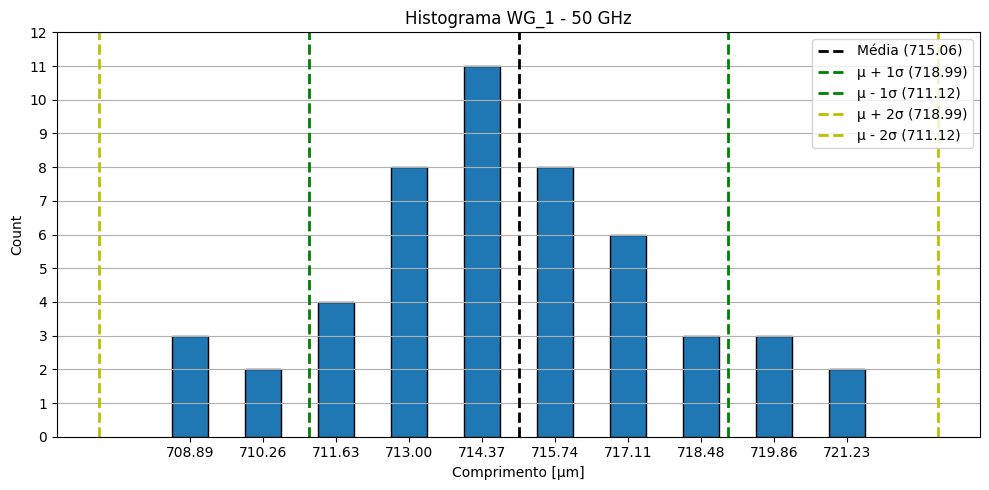

In [33]:
espacamento= np.min(np.diff(valores_1))*0.5

media = np.mean(valores_1)
desvio_padrao = np.std(valores_1)

plt.figure(figsize=(10, 5))
plt.bar(valores_1, count_1, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_1))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_1]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_1)+1,num=max(count_1)+2))
plt.ylabel('Count')
plt.title('Histograma WG_1 - 50 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

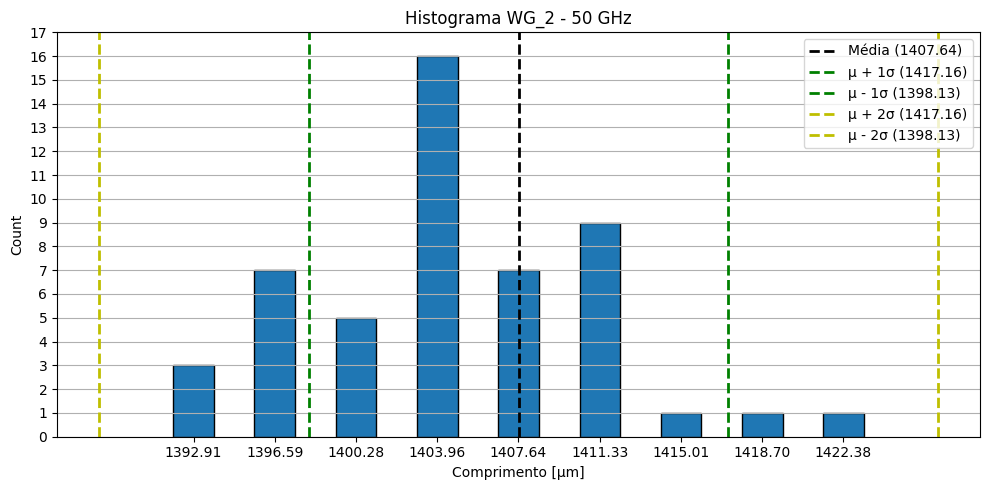

In [34]:
espacamento= np.min(np.diff(valores_2))*0.5

media = np.mean(valores_2)
desvio_padrao = np.std(valores_2)

plt.figure(figsize=(10, 5))
plt.bar(valores_2, count_2, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_2))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_2]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_2)+1,num=max(count_2)+2))
plt.ylabel('Count')
plt.title('Histograma WG_2 - 50 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

In [45]:
interApi.setsweep(MC_name, "number of trials", 5)
interApi.setsweep(MC_name, "batch size", 5)

1.0

In [46]:
interApi.runsweep(MC_name)

In [47]:
result_data_1 = interApi.getsweepresult(MC_name, "gain_out_1")
result_data_2 = interApi.getsweepresult(MC_name, "gain_out_2")

wavelengths_1 = result_data_1["wavelength"].flatten()
gain_db_1 = result_data_1["'TE' gain (dB)"]
wavelengths_2 = result_data_2["wavelength"].flatten()
gain_db_2 = result_data_2["'TE' gain (dB)"]

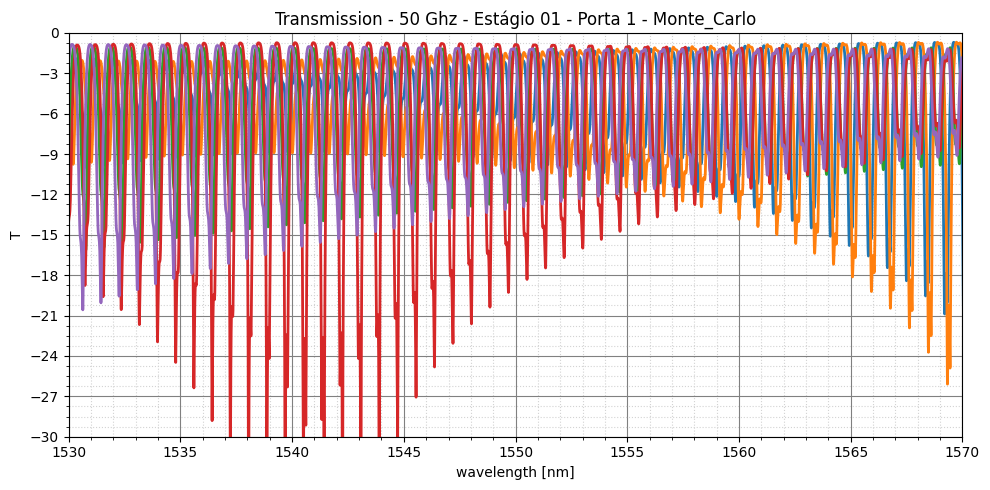

In [ ]:
fig13 = plt.figure(figsize=(10,5))
ax13 = fig13.add_subplot(111)

plt.plot(wavelengths_1/nm, gain_db_1, linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 50 Ghz - Estágio 01 - Porta 1 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.show()

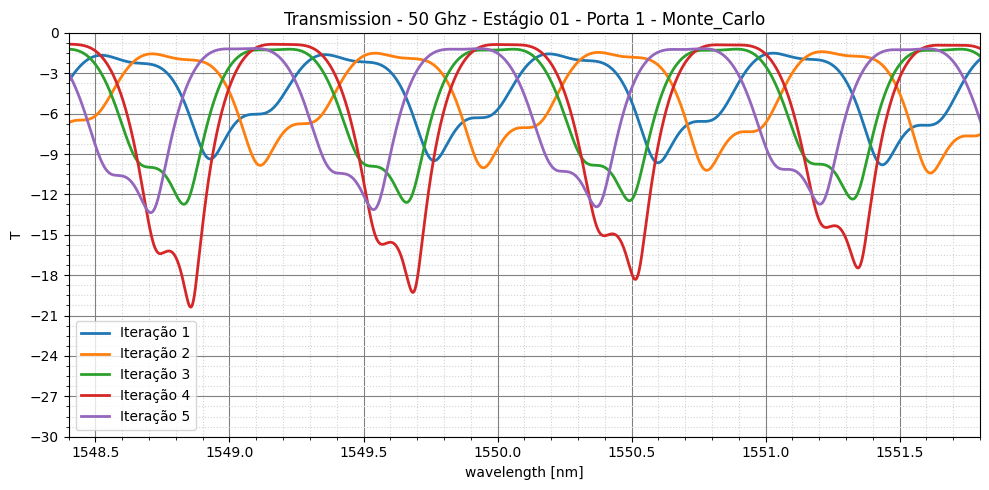

In [73]:
fig13 = plt.figure(figsize=(10,5))
ax13 = fig13.add_subplot(111)

for i in range (5):
    plt.plot(wavelengths_1/nm, gain_db_1[:,i], label = f'Iteração {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+18.4, (stop_wavelenth/nm)-30-18.2])
plt.ylim([-30, 0])
plt.title(r'Transmission - 50 Ghz - Estágio 01 - Porta 1 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))
plt.legend()
plt.minorticks_on()

plt.tight_layout()
plt.show()

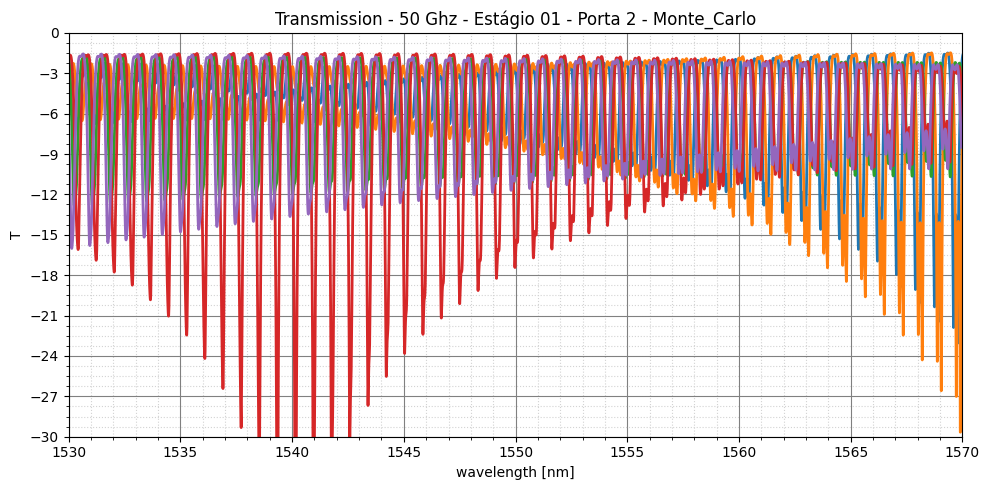

In [ ]:
fig14 = plt.figure(figsize=(10,5))
ax14 = fig14.add_subplot(111)

plt.plot(wavelengths_2/nm, gain_db_2, linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 50 Ghz - Estágio 01 - Porta 2 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.show()

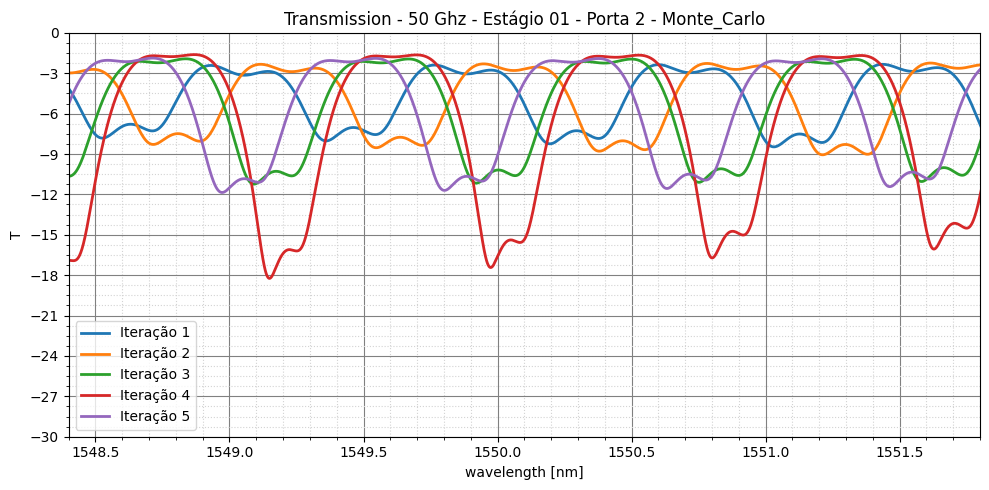

In [70]:
fig14 = plt.figure(figsize=(10,5))
ax14 = fig14.add_subplot(111)

for i in range (5):
    plt.plot(wavelengths_2/nm, gain_db_2[:,i], label = f'Iteração {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+18.4, (stop_wavelenth/nm)-30-18.2])
plt.ylim([-30, 0])
plt.title(r'Transmission - 50 Ghz - Estágio 01 - Porta 2 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))
plt.legend()
plt.minorticks_on()

plt.tight_layout()
plt.show()

100 GHz

In [150]:
interApi.switchtolayout()

for i in range (2):

    interApi.select(f'WGD_maior_{i+1}')
    interApi.delete()
    interApi.select(f'WGD_menor_{i+1}')
    interApi.delete()

    interApi.addelement('ebeam_wg_integral_1550')
    interApi.set('name', f'WGD_maior_{i+1}')
    interApi.setposition(f'WGD_maior_{i+1}', interApi.getnamed('Acoplador_Direcional_in','x position')+(2*i+1)*distancia/2, interApi.getnamed('Acoplador_Direcional_in','y position') + ((-1)**(i+1))*distancia_y)
    interApi.set('wg_length', L2[1][0] + i*d_L[1][0])

    interApi.addelement('ebeam_wg_integral_1550')
    interApi.set('name', f'WGD_menor_{i+1}')
    interApi.setposition(f'WGD_menor_{i+1}', interApi.getnamed('Acoplador_Direcional_in','x position')+(2*i+1)*distancia/2, interApi.getnamed('Acoplador_Direcional_in','y position') - ((-1)**(i+1))*distancia_y)
    interApi.set('wg_length', L1)

In [151]:
interApi.switchtolayout()

interApi.select('ONA')
interApi.delete()

interApi.addelement('Optical Network Analyzer')
interApi.set('name', 'ONA')
interApi.setposition('ONA', x_ona, y_ona)
interApi.set('number of input ports', 2)
interApi.set('input parameter', 'start and stop')
interApi.set('start frequency', c/start_wavelenth)
interApi.set('stop frequency', c/stop_wavelenth)
interApi.set('number of points', number_point)
interApi.setnamed('ONA', 'Rotated', 45)

In [152]:
interApi.connect('ONA', 'output', 'Acoplador_Direcional_in', 'opt_2')
interApi.connect('Acoplador_Direcional_in', 'opt_3', f'WGD_maior_1', 'port 1')
interApi.connect('Acoplador_Direcional_in', 'opt_4', f'WGD_menor_1', 'port 1')

for i in range (1):
    interApi.connect(f'WGD_maior_{i+1}', 'port 2', f'Acoplador_Direcional_{i+1}', 'opt_1')
    interApi.connect(f'WGD_menor_{i+1}', 'port 2', f'Acoplador_Direcional_{i+1}', 'opt_2')
    interApi.connect(f'Acoplador_Direcional_{i+1}', 'opt_4', f'WGD_maior_{i+2}', 'port 1')
    interApi.connect(f'Acoplador_Direcional_{i+1}', 'opt_3', f'WGD_menor_{i+2}', 'port 1')
    interApi.connect(f'WGD_maior_{i+2}', 'port 2', f'Acoplador_Direcional_{i+2}', 'opt_2')
    interApi.connect(f'WGD_menor_{i+2}', 'port 2', f'Acoplador_Direcional_{i+2}', 'opt_1')
    interApi.connect(f'Acoplador_Direcional_{i+2}', 'opt_3', 'ONA', f'input {i+1}')
    interApi.connect(f'Acoplador_Direcional_{i+2}', 'opt_4', 'ONA', f'input {i+2}')

In [153]:
interApi.save(file)

In [154]:
interApi.run(1)

In [155]:
FSR_GAIN = [None]*2
wavelength_GAIN = [None]*2
transmission_GAIN = [None]*2

for i in range (2):
    FSR_GAIN[i] = interApi.getresult('ONA', f'input {i+1}/mode 1/gain')

    wavelength_GAIN[i] = np.array(FSR_GAIN[i]['wavelength']).flatten()
    transmission_GAIN[i] = np.array(FSR_GAIN[i]["'TE' gain (dB)"])

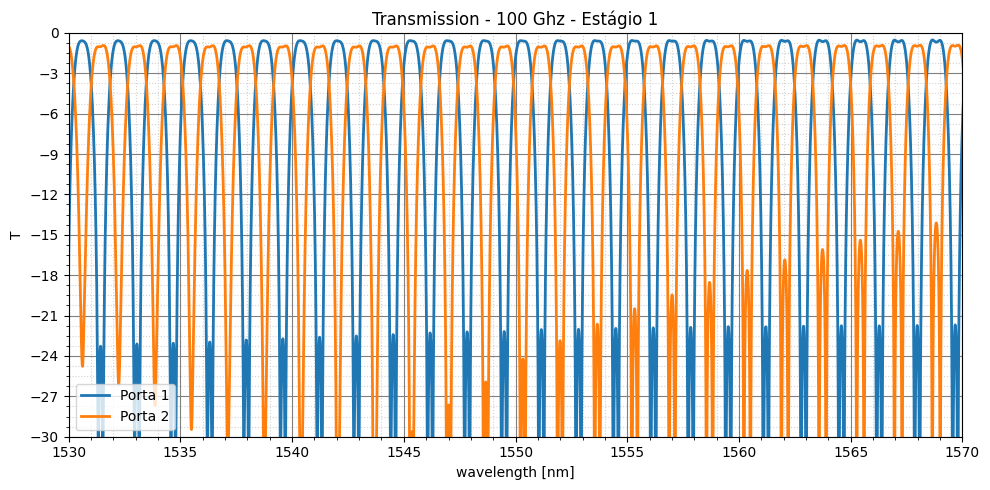

In [156]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

for i in range(2):
    plt.plot((wavelength_GAIN[i]/nm), transmission_GAIN[i], label = f'Porta {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 100 Ghz - Estágio 1')
plt.legend(loc='lower left')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 100 Ghz - Estagio 1.png')
plt.show()

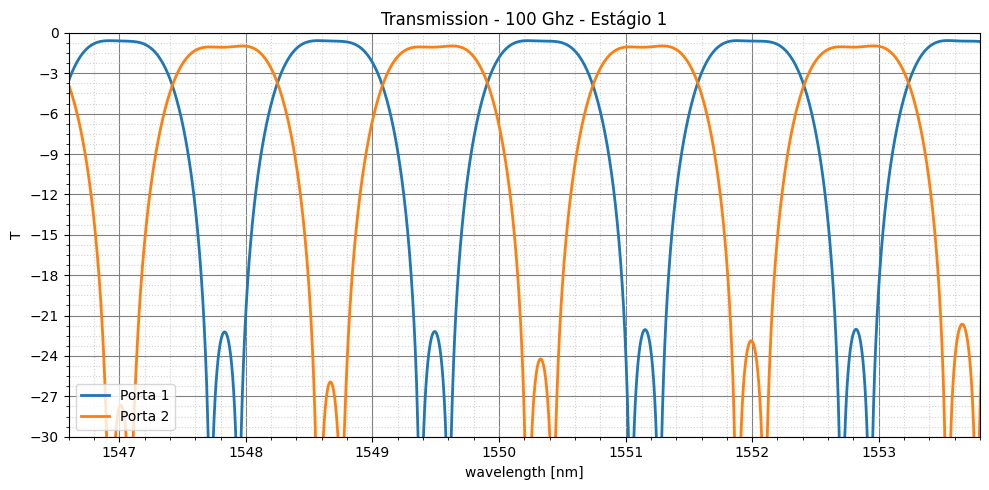

In [157]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

for i in range(2):
    plt.plot((wavelength_GAIN[i]/nm), transmission_GAIN[i], label = f'Porta {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+16.6, (stop_wavelenth/nm)-30-16.2])
plt.ylim([-30, 0])
plt.title(r'Transmission - 100 Ghz - Estágio 1')
plt.legend(loc='lower left')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 100 Ghz - Estagio 1 - zoom.png')
plt.show()

Análise Monte Carlo

In [158]:
MC_name = "MC_script_DC_100"
interApi.deletesweep(MC_name)

interApi.addsweep(2)

interApi.setsweep("Monte Carlo analysis", "name", MC_name)
interApi.setsweep(MC_name, "number of trials", 50)
interApi.setsweep(MC_name, "batch size", 50)
interApi.setsweep(MC_name, "enable seed", 1)
interApi.setsweep(MC_name, "seed", 1)
interApi.setsweep(MC_name, "Variation", "Both")

1.0

In [159]:
interApi.setsweep(MC_name, "type", "Parameters")

param05 = {
    "Name": "cpl_0.5",
    "Parameter": "::Root Element::Acoplador_Direcional_in::coupling_length",
    "Value": interApi.getnamed("Acoplador_Direcional_in", "coupling_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.02*interApi.getnamed("Acoplador_Direcional_in", "coupling_length")
    }
}

param029 = {
    "Name": "cpl_0.29",
    "Parameter": "::Root Element::Acoplador_Direcional_1::coupling_length",
    "Value": interApi.getnamed("Acoplador_Direcional_1", "coupling_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.02*interApi.getnamed("Acoplador_Direcional_1", "coupling_length")
    }
}

param008 = {
    "Name": "cpl_0.08",
    "Parameter": "::Root Element::Acoplador_Direcional_2::coupling_length",
    "Value": interApi.getnamed("Acoplador_Direcional_2", "coupling_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.02*interApi.getnamed("Acoplador_Direcional_2", "coupling_length")
    }
}

interApi.addsweepparameter(MC_name, param05)
interApi.addsweepparameter(MC_name, param029)
interApi.addsweepparameter(MC_name, param008)

'cpl_0.08'

In [160]:
result_gain_1 = {
    "Name": "gain_out_1",
    "Result": "::Root Element::ONA::input 1/mode 1/gain",
    "Estimation": True
}

result_gain_2 = {
    "Name": "gain_out_2",
    "Result": "::Root Element::ONA::input 2/mode 1/gain",
    "Estimation": True
}

interApi.addsweepresult(MC_name, result_gain_1)
interApi.addsweepresult(MC_name, result_gain_2)

'gain_out_2'

In [161]:
interApi.runsweep(MC_name)

In [162]:
histo_05 = pd.read_csv('Histograma_0.5_100.txt', skiprows=3, names=['cpl_0.5', 'count'])
histo_029 = pd.read_csv('Histograma_0.29_100.txt', skiprows=3, names=['cpl_0.29', 'count'])
histo_008 = pd.read_csv('Histograma_0.08_100.txt', skiprows=3, names=['cpl_0.29', 'count'])

valores_05 = histo_05['cpl_0.5'].to_numpy()
count_05 = histo_05['count'].to_numpy()

valores_029 = histo_029['cpl_0.29'].to_numpy()
count_029 = histo_029['count'].to_numpy()

valores_008 = histo_008['cpl_0.29'].to_numpy()
count_008 = histo_008['count'].to_numpy()

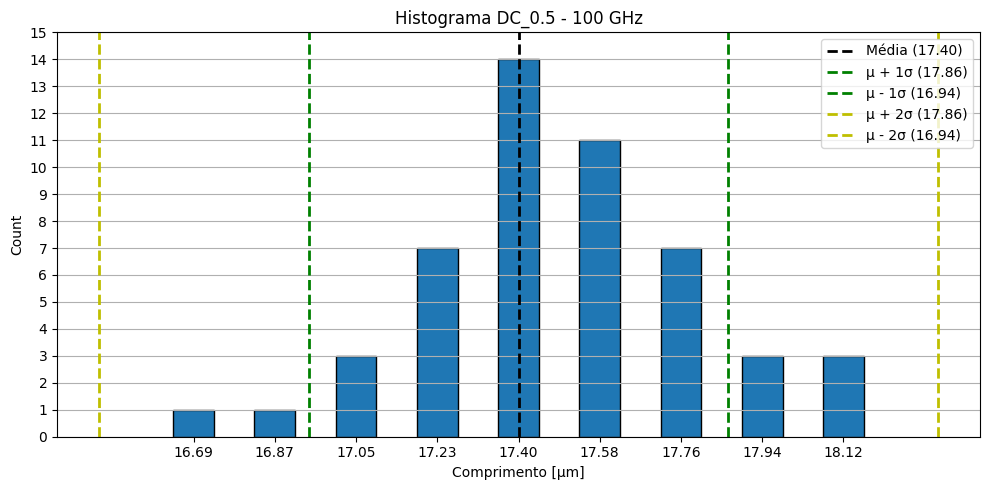

In [163]:
espacamento= np.min(np.diff(valores_05))*0.5

media = np.mean(valores_05)
desvio_padrao = np.std(valores_05)

plt.figure(figsize=(10, 5))
plt.bar(valores_05, count_05, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_05))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_05]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_05)+1,num=max(count_05)+2))
plt.ylabel('Count')
plt.title('Histograma DC_0.5 - 100 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

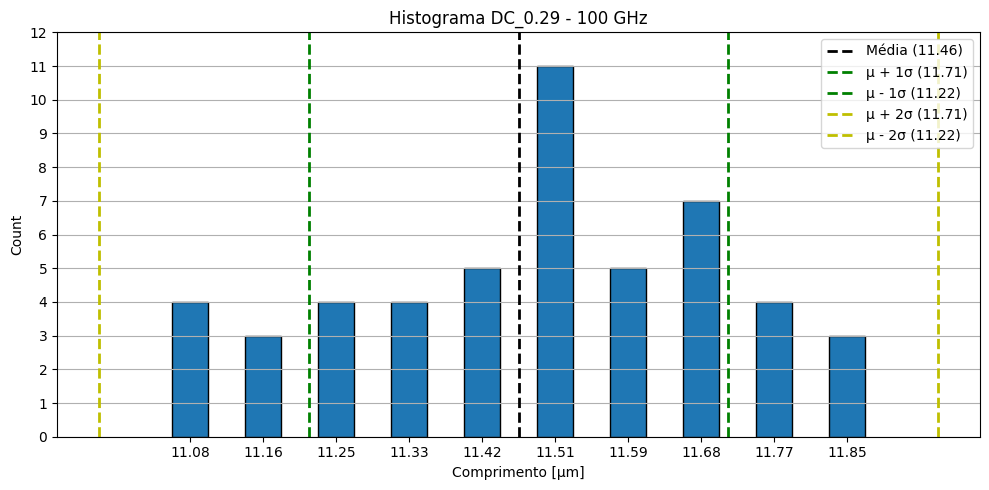

In [164]:
espacamento= np.min(np.diff(valores_029))*0.5

media = np.mean(valores_029)
desvio_padrao = np.std(valores_029)

plt.figure(figsize=(10, 5))
plt.bar(valores_029, count_029, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_029))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_029]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_029)+1,num=max(count_029)+2))
plt.ylabel('Count')
plt.title('Histograma DC_0.29 - 100 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

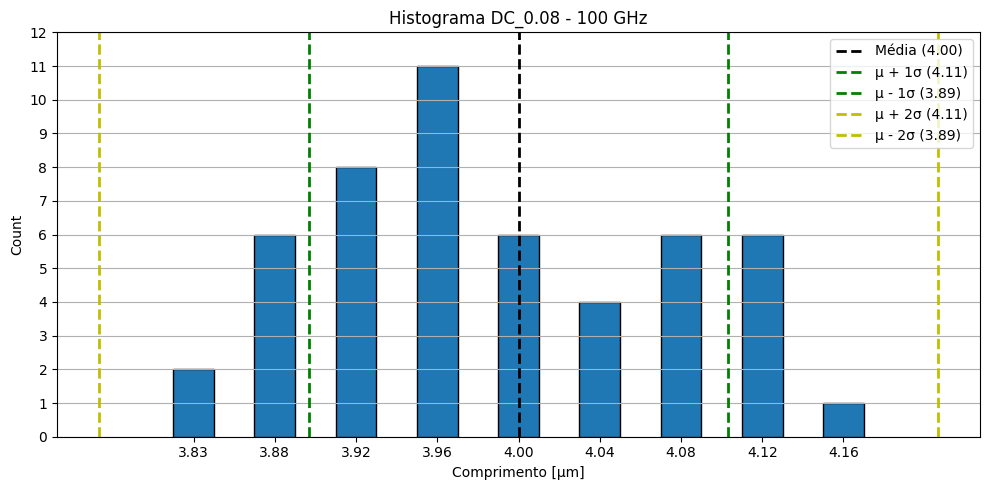

In [165]:
espacamento= np.min(np.diff(valores_008))*0.5

media = np.mean(valores_008)
desvio_padrao = np.std(valores_008)

plt.figure(figsize=(10, 5))
plt.bar(valores_008, count_008, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_008))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_008]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_008)+1,num=max(count_008)+2))
plt.ylabel('Count')
plt.title('Histograma DC_0.08 - 100 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

In [166]:
interApi.setsweep(MC_name, "number of trials", 5)
interApi.setsweep(MC_name, "batch size", 5)

1.0

In [167]:
interApi.runsweep(MC_name)

In [168]:
result_data_1 = interApi.getsweepresult(MC_name, "gain_out_1")
result_data_2 = interApi.getsweepresult(MC_name, "gain_out_2")

wavelengths_1 = result_data_1["wavelength"].flatten()
gain_db_1 = result_data_1["'TE' gain (dB)"]
wavelengths_2 = result_data_2["wavelength"].flatten()
gain_db_2 = result_data_2["'TE' gain (dB)"]

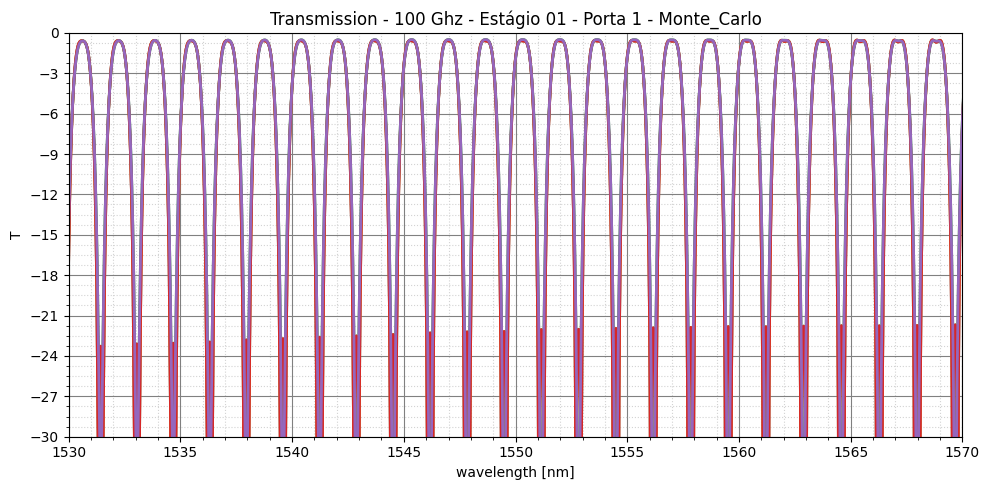

In [169]:
fig21 = plt.figure(figsize=(10,5))
ax21 = fig21.add_subplot(111)

plt.plot(wavelengths_1/nm, gain_db_1, linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 100 Ghz - Estágio 01 - Porta 1 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.show()

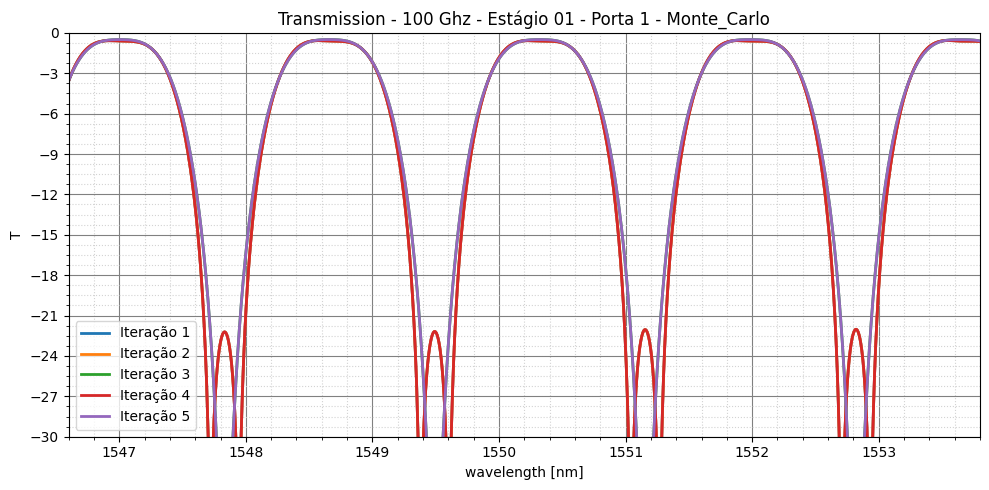

In [173]:
fig21 = plt.figure(figsize=(10,5))
ax21 = fig21.add_subplot(111)

for i in range (5):
    plt.plot(wavelengths_1/nm, gain_db_1[:,i], label = f'Iteração {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+16.6, (stop_wavelenth/nm)-30-16.2])
plt.ylim([-30, 0])
plt.title(r'Transmission - 100 Ghz - Estágio 01 - Porta 1 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))
plt.legend()
plt.minorticks_on()

plt.tight_layout()
plt.show()

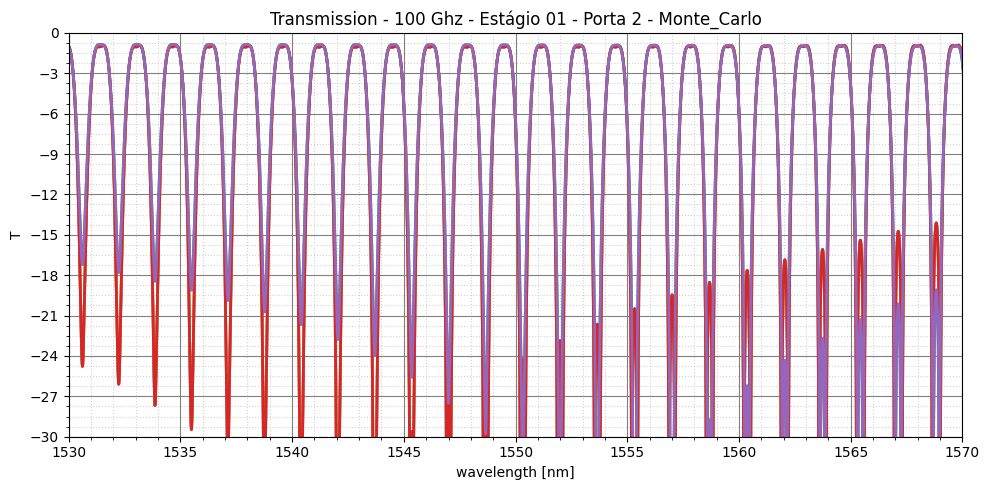

In [174]:
fig22 = plt.figure(figsize=(10,5))
ax22 = fig22.add_subplot(111)

plt.plot(wavelengths_2/nm, gain_db_2, linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 100 Ghz - Estágio 01 - Porta 2 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.show()

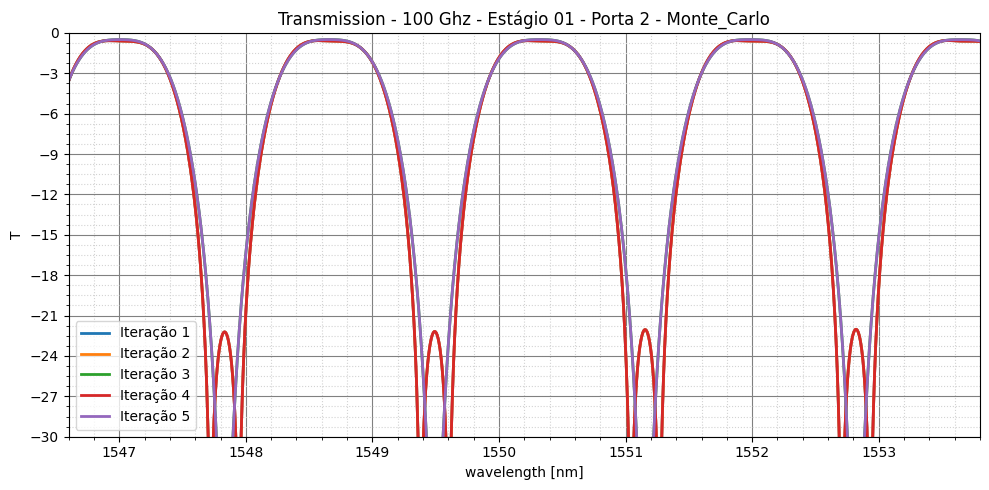

In [175]:
fig22 = plt.figure(figsize=(10,5))
ax22 = fig22.add_subplot(111)

for i in range (5):
    plt.plot(wavelengths_1/nm, gain_db_1[:,i], label = f'Iteração {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+16.6, (stop_wavelenth/nm)-30-16.2])
plt.ylim([-30, 0])
plt.title(r'Transmission - 100 Ghz - Estágio 01 - Porta 2 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))
plt.legend()
plt.minorticks_on()

plt.tight_layout()
plt.show()

In [82]:
MC_name = "MC_script_WG_100"
interApi.deletesweep(MC_name)

interApi.addsweep(2)

interApi.setsweep("Monte Carlo analysis", "name", MC_name)
interApi.setsweep(MC_name, "number of trials", 50)
interApi.setsweep(MC_name, "batch size", 50)
interApi.setsweep(MC_name, "enable seed", 1)
interApi.setsweep(MC_name, "seed", 1)
interApi.setsweep(MC_name, "Variation", "Both")

1.0

In [83]:
interApi.setsweep(MC_name, "type", "Parameters")

param1 = {
    "Name": "wg_1",
    "Parameter": "::Root Element::WGD_maior_1::wg_length",
    "Value": interApi.getnamed("WGD_maior_1", "wg_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.005*interApi.getnamed("WGD_maior_1", "wg_length")
    }
}

param2 = {
    "Name": "wg_2",
    "Parameter": "::Root Element::WGD_maior_2::wg_length",
    "Value": interApi.getnamed("WGD_maior_2", "wg_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.005*interApi.getnamed("WGD_maior_2", "wg_length")
    }
}

interApi.addsweepparameter(MC_name, param1)
interApi.addsweepparameter(MC_name, param2)

'wg_2'

In [84]:
result_gain_1 = {
    "Name": "gain_out_1",
    "Result": "::Root Element::ONA::input 1/mode 1/gain",
    "Estimation": True
}

result_gain_2 = {
    "Name": "gain_out_2",
    "Result": "::Root Element::ONA::input 2/mode 1/gain",
    "Estimation": True
}

interApi.addsweepresult(MC_name, result_gain_1)
interApi.addsweepresult(MC_name, result_gain_2)

'gain_out_2'

In [85]:
interApi.runsweep(MC_name)

In [87]:
histo_1 = pd.read_csv('Histograma_1_100.txt', skiprows=3, names=['wg_1', 'count'])
histo_2 = pd.read_csv('Histograma_2_100.txt', skiprows=3, names=['wg_2', 'count'])

valores_1 = histo_1['wg_1'].to_numpy()/um
count_1 = histo_1['count'].to_numpy()

valores_2 = histo_2['wg_2'].to_numpy()/um
count_2 = histo_2['count'].to_numpy()

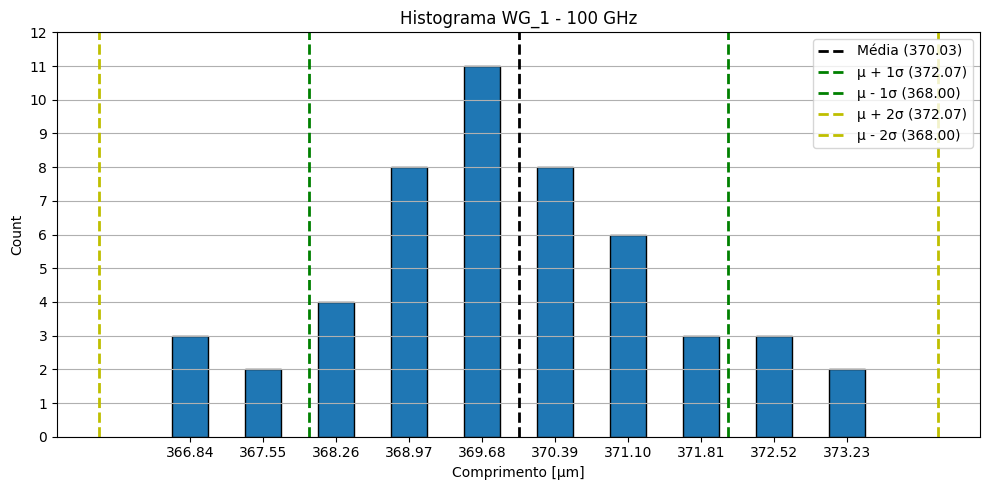

In [88]:
espacamento= np.min(np.diff(valores_1))*0.5

media = np.mean(valores_1)
desvio_padrao = np.std(valores_1)

plt.figure(figsize=(10, 5))
plt.bar(valores_1, count_1, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_1))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_1]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_1)+1,num=max(count_1)+2))
plt.ylabel('Count')
plt.title('Histograma WG_1 - 100 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

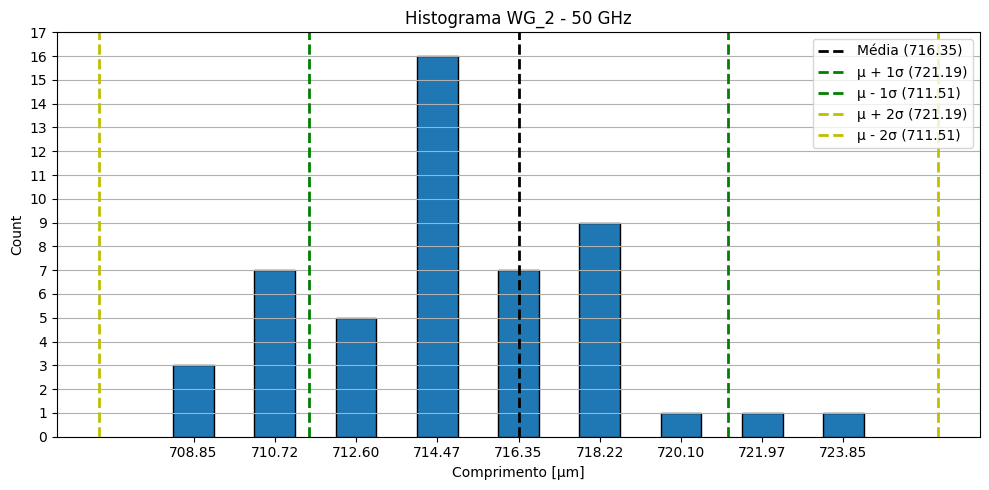

In [89]:
espacamento= np.min(np.diff(valores_2))*0.5

media = np.mean(valores_2)
desvio_padrao = np.std(valores_2)

plt.figure(figsize=(10, 5))
plt.bar(valores_2, count_2, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_2))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_2]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_2)+1,num=max(count_2)+2))
plt.ylabel('Count')
plt.title('Histograma WG_2 - 50 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

In [90]:
interApi.setsweep(MC_name, "number of trials", 5)
interApi.setsweep(MC_name, "batch size", 5)

1.0

In [91]:
interApi.runsweep(MC_name)

In [92]:
result_data_1 = interApi.getsweepresult(MC_name, "gain_out_1")
result_data_2 = interApi.getsweepresult(MC_name, "gain_out_2")

wavelengths_1 = result_data_1["wavelength"].flatten()
gain_db_1 = result_data_1["'TE' gain (dB)"]
wavelengths_2 = result_data_2["wavelength"].flatten()
gain_db_2 = result_data_2["'TE' gain (dB)"]

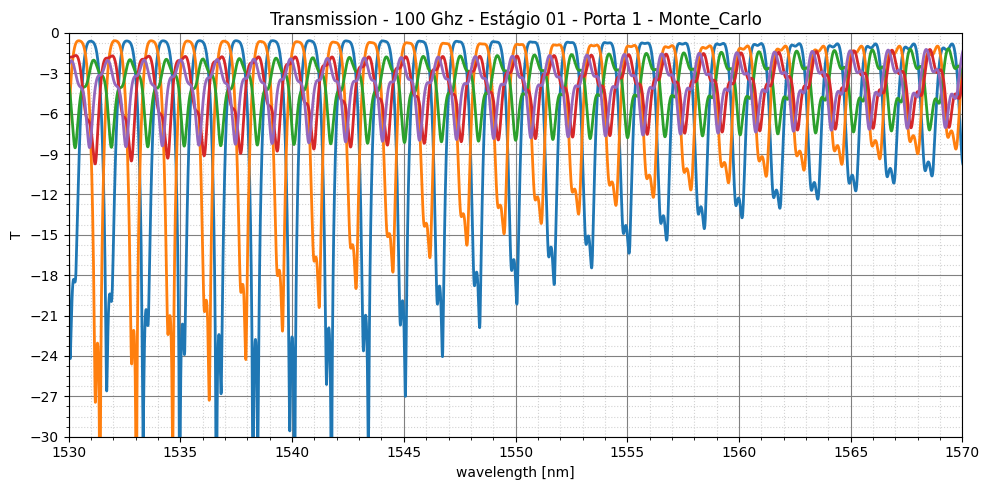

In [ ]:
fig23 = plt.figure(figsize=(10,5))
ax23 = fig23.add_subplot(111)

plt.plot(wavelengths_1/nm, gain_db_1, linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 100 Ghz - Estágio 01 - Porta 1 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.show()

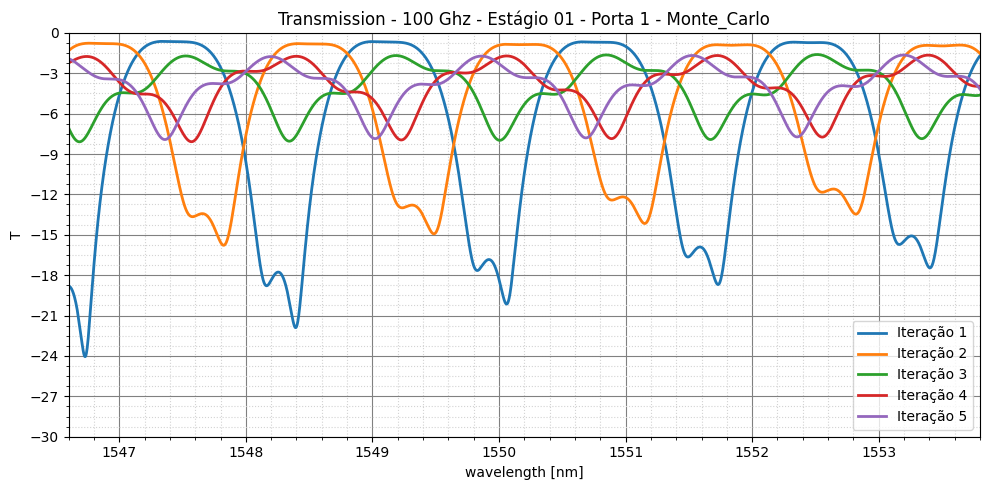

In [94]:
fig23 = plt.figure(figsize=(10,5))
ax23 = fig23.add_subplot(111)

for i in range (5):
    plt.plot(wavelengths_1/nm, gain_db_1[:,i], label = f'Iteração {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+16.6, (stop_wavelenth/nm)-30-16.2])
plt.ylim([-30, 0])
plt.title(r'Transmission - 100 Ghz - Estágio 01 - Porta 1 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))
plt.legend()
plt.minorticks_on()

plt.tight_layout()
plt.show()

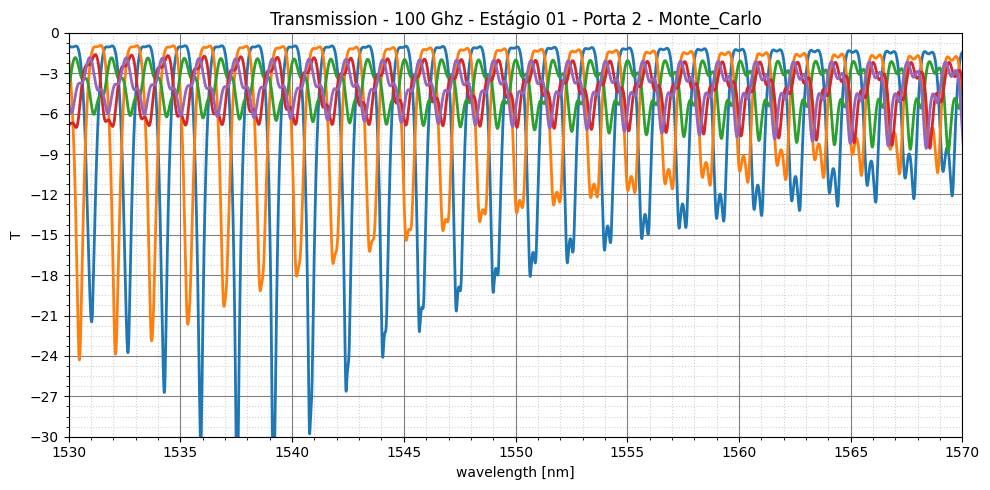

In [ ]:
fig24 = plt.figure(figsize=(10,5))
ax24 = fig24.add_subplot(111)

plt.plot(wavelengths_2/nm, gain_db_2, linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 100 Ghz - Estágio 01 - Porta 2 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.show()

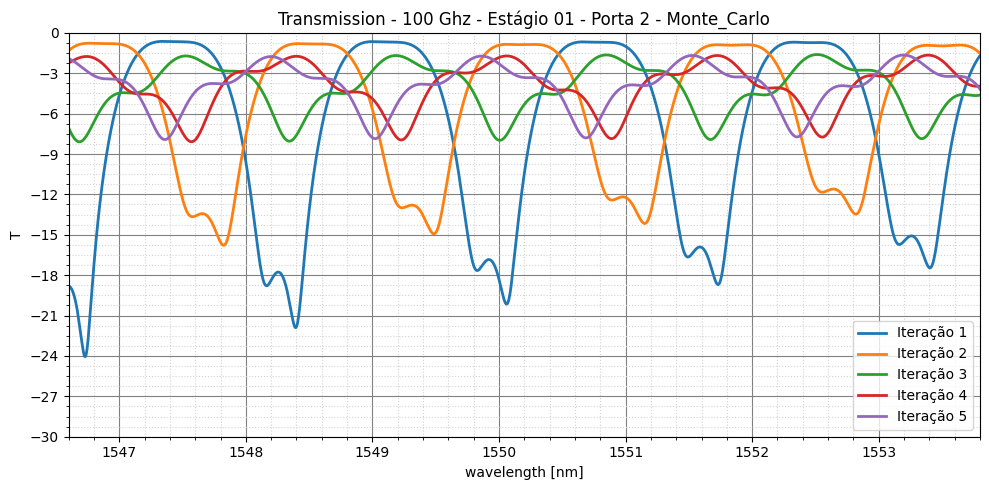

In [98]:
fig22 = plt.figure(figsize=(10,5))
ax22 = fig22.add_subplot(111)

for i in range (5):
    plt.plot(wavelengths_1/nm, gain_db_1[:,i], label = f'Iteração {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+16.6, (stop_wavelenth/nm)-30-16.2])
plt.ylim([-30, 0])
plt.title(r'Transmission - 100 Ghz - Estágio 01 - Porta 2 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))
plt.legend()
plt.minorticks_on()

plt.tight_layout()
plt.show()

200 GHz

In [176]:
interApi.switchtolayout()

for i in range (2):

    interApi.select(f'WGD_maior_{i+1}')
    interApi.delete()
    interApi.select(f'WGD_menor_{i+1}')
    interApi.delete()

    interApi.addelement('ebeam_wg_integral_1550')
    interApi.set('name', f'WGD_maior_{i+1}')
    interApi.setposition(f'WGD_maior_{i+1}', interApi.getnamed('Acoplador_Direcional_in','x position')+(2*i+1)*distancia/2, interApi.getnamed('Acoplador_Direcional_in','y position') + ((-1)**(i+1))*distancia_y)
    interApi.set('wg_length', L2[2][0] + i*d_L[2][0])

    interApi.addelement('ebeam_wg_integral_1550')
    interApi.set('name', f'WGD_menor_{i+1}')
    interApi.setposition(f'WGD_menor_{i+1}', interApi.getnamed('Acoplador_Direcional_in','x position')+(2*i+1)*distancia/2, interApi.getnamed('Acoplador_Direcional_in','y position') - ((-1)**(i+1))*distancia_y)
    interApi.set('wg_length', L1)

In [177]:
interApi.switchtolayout()

interApi.select('ONA')
interApi.delete()

interApi.addelement('Optical Network Analyzer')
interApi.set('name', 'ONA')
interApi.setposition('ONA', x_ona, y_ona)
interApi.set('number of input ports', 2)
interApi.set('input parameter', 'start and stop')
interApi.set('start frequency', c/start_wavelenth)
interApi.set('stop frequency', c/stop_wavelenth)
interApi.set('number of points', number_point)
interApi.setnamed('ONA', 'Rotated', 45)

In [178]:
interApi.connect('ONA', 'output', 'Acoplador_Direcional_in', 'opt_2')
interApi.connect('Acoplador_Direcional_in', 'opt_3', f'WGD_maior_1', 'port 1')
interApi.connect('Acoplador_Direcional_in', 'opt_4', f'WGD_menor_1', 'port 1')

for i in range (1):
    interApi.connect(f'WGD_maior_{i+1}', 'port 2', f'Acoplador_Direcional_{i+1}', 'opt_1')
    interApi.connect(f'WGD_menor_{i+1}', 'port 2', f'Acoplador_Direcional_{i+1}', 'opt_2')
    interApi.connect(f'Acoplador_Direcional_{i+1}', 'opt_4', f'WGD_maior_{i+2}', 'port 1')
    interApi.connect(f'Acoplador_Direcional_{i+1}', 'opt_3', f'WGD_menor_{i+2}', 'port 1')
    interApi.connect(f'WGD_maior_{i+2}', 'port 2', f'Acoplador_Direcional_{i+2}', 'opt_2')
    interApi.connect(f'WGD_menor_{i+2}', 'port 2', f'Acoplador_Direcional_{i+2}', 'opt_1')
    interApi.connect(f'Acoplador_Direcional_{i+2}', 'opt_3', 'ONA', f'input {i+1}')
    interApi.connect(f'Acoplador_Direcional_{i+2}', 'opt_4', 'ONA', f'input {i+2}')

In [179]:
interApi.save(file)

In [180]:
interApi.run(1)

In [181]:
FSR_GAIN = [None]*2
wavelength_GAIN = [None]*2
transmission_GAIN = [None]*2

for i in range (2):
    FSR_GAIN[i] = interApi.getresult('ONA', f'input {i+1}/mode 1/gain')

    wavelength_GAIN[i] = np.array(FSR_GAIN[i]['wavelength']).flatten()
    transmission_GAIN[i] = np.array(FSR_GAIN[i]["'TE' gain (dB)"])

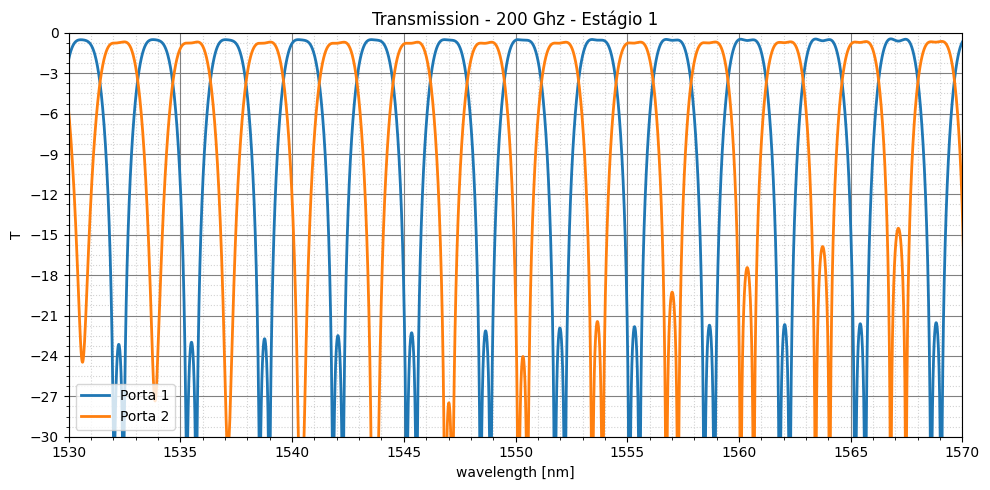

In [182]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

for i in range(2):
    plt.plot((wavelength_GAIN[i]/nm), transmission_GAIN[i], label = f'Porta {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 200 Ghz - Estágio 1')
plt.legend(loc='lower left')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 200 Ghz - Estagio 1.png')
plt.show()

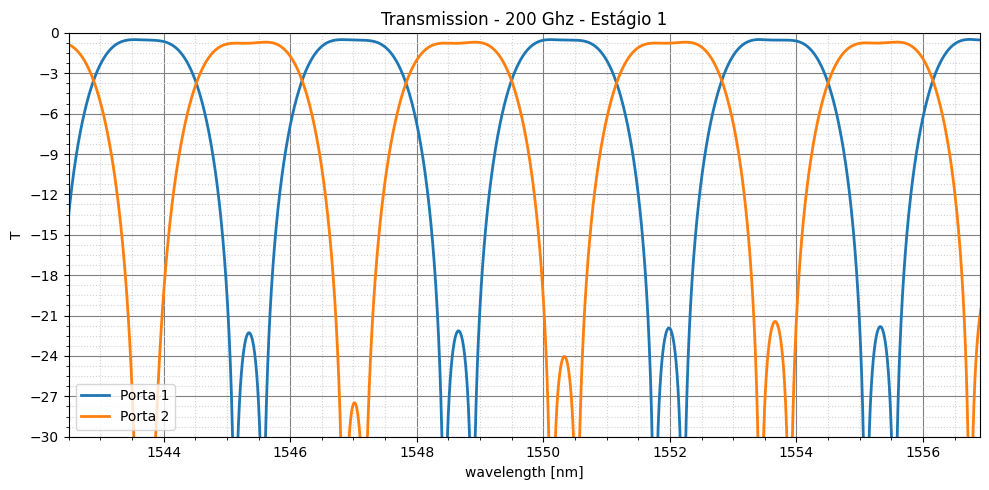

In [183]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

for i in range(2):
    plt.plot((wavelength_GAIN[i]/nm), transmission_GAIN[i], label = f'Porta {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+12.5, (stop_wavelenth/nm)-30-13.1])
plt.ylim([-30, 0])
plt.title(r'Transmission - 200 Ghz - Estágio 1')
plt.legend(loc='lower left')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 200 Ghz - Estagio 1 - zoom.png')
plt.show()

Análise Monte Carlo

In [184]:
MC_name = "MC_script_DC_200"
interApi.deletesweep(MC_name)

interApi.addsweep(2)

interApi.setsweep("Monte Carlo analysis", "name", MC_name)
interApi.setsweep(MC_name, "number of trials", 50)
interApi.setsweep(MC_name, "batch size", 50)
interApi.setsweep(MC_name, "enable seed", 1)
interApi.setsweep(MC_name, "seed", 1)
interApi.setsweep(MC_name, "Variation", "Both")

1.0

In [185]:
interApi.setsweep(MC_name, "type", "Parameters")

param05 = {
    "Name": "cpl_0.5",
    "Parameter": "::Root Element::Acoplador_Direcional_in::coupling_length",
    "Value": interApi.getnamed("Acoplador_Direcional_in", "coupling_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.02*interApi.getnamed("Acoplador_Direcional_in", "coupling_length")
    }
}

param029 = {
    "Name": "cpl_0.29",
    "Parameter": "::Root Element::Acoplador_Direcional_1::coupling_length",
    "Value": interApi.getnamed("Acoplador_Direcional_1", "coupling_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.02*interApi.getnamed("Acoplador_Direcional_1", "coupling_length")
    }
}

param008 = {
    "Name": "cpl_0.08",
    "Parameter": "::Root Element::Acoplador_Direcional_2::coupling_length",
    "Value": interApi.getnamed("Acoplador_Direcional_2", "coupling_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.02*interApi.getnamed("Acoplador_Direcional_2", "coupling_length")
    }
}

interApi.addsweepparameter(MC_name, param05)
interApi.addsweepparameter(MC_name, param029)
interApi.addsweepparameter(MC_name, param008)

'cpl_0.08'

In [186]:
result_gain_1 = {
    "Name": "gain_out_1",
    "Result": "::Root Element::ONA::input 1/mode 1/gain",
    "Estimation": True
}

result_gain_2 = {
    "Name": "gain_out_2",
    "Result": "::Root Element::ONA::input 2/mode 1/gain",
    "Estimation": True
}

interApi.addsweepresult(MC_name, result_gain_1)
interApi.addsweepresult(MC_name, result_gain_2)

'gain_out_2'

In [187]:
interApi.runsweep(MC_name)

In [188]:
histo_05 = pd.read_csv('Histograma_0.5_200.txt', skiprows=3, names=['cpl_0.5', 'count'])
histo_029 = pd.read_csv('Histograma_0.29_200.txt', skiprows=3, names=['cpl_0.29', 'count'])
histo_008 = pd.read_csv('Histograma_0.08_200.txt', skiprows=3, names=['cpl_0.29', 'count'])

valores_05 = histo_05['cpl_0.5'].to_numpy()
count_05 = histo_05['count'].to_numpy()

valores_029 = histo_029['cpl_0.29'].to_numpy()
count_029 = histo_029['count'].to_numpy()

valores_008 = histo_008['cpl_0.29'].to_numpy()
count_008 = histo_008['count'].to_numpy()

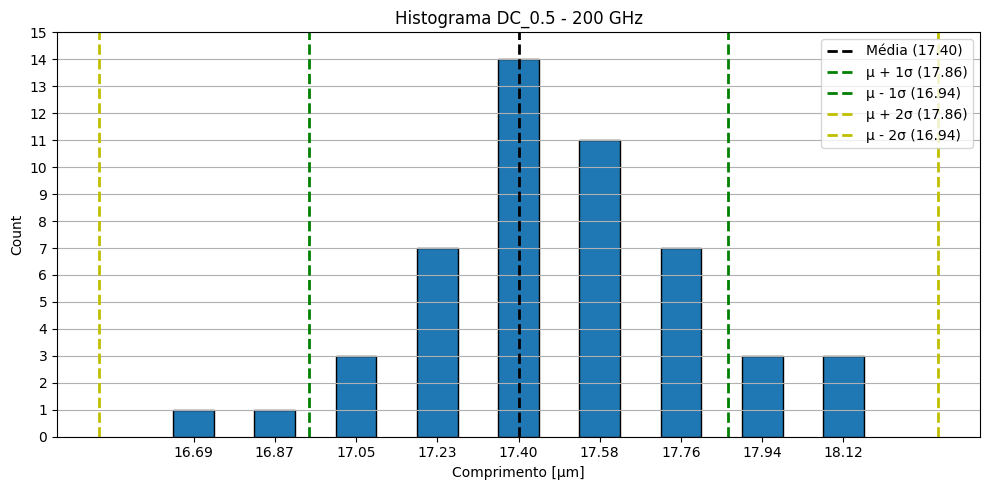

In [189]:
espacamento= np.min(np.diff(valores_05))*0.5

media = np.mean(valores_05)
desvio_padrao = np.std(valores_05)

plt.figure(figsize=(10, 5))
plt.bar(valores_05, count_05, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_05))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_05]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_05)+1,num=max(count_05)+2))
plt.ylabel('Count')
plt.title('Histograma DC_0.5 - 200 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

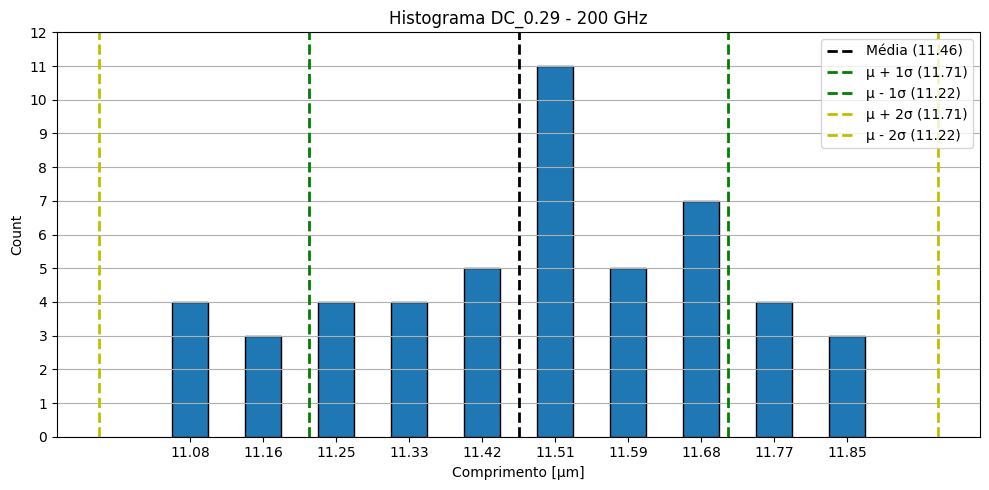

In [190]:
espacamento= np.min(np.diff(valores_029))*0.5

media = np.mean(valores_029)
desvio_padrao = np.std(valores_029)

plt.figure(figsize=(10, 5))
plt.bar(valores_029, count_029, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_029))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_029]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_029)+1,num=max(count_029)+2))
plt.ylabel('Count')
plt.title('Histograma DC_0.29 - 200 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

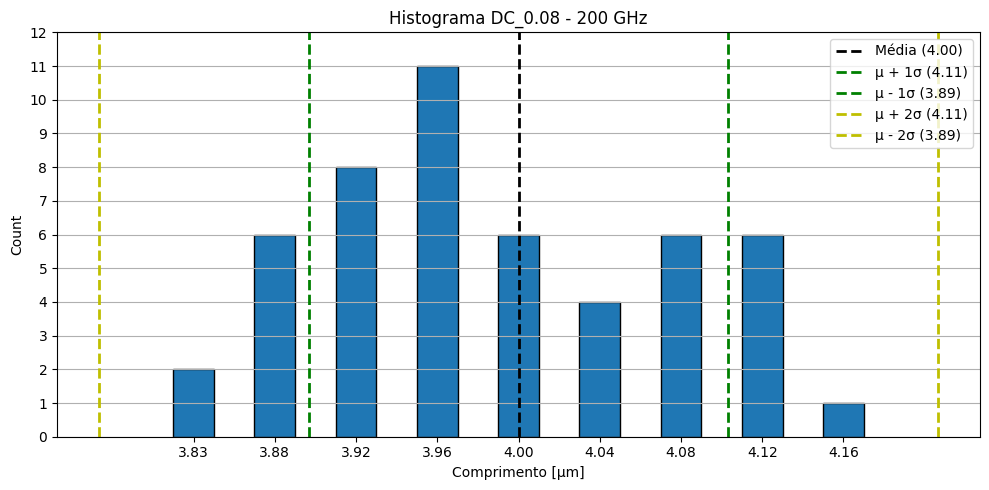

In [191]:
espacamento= np.min(np.diff(valores_008))*0.5

media = np.mean(valores_008)
desvio_padrao = np.std(valores_008)

plt.figure(figsize=(10, 5))
plt.bar(valores_008, count_008, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_008))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_008]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_008)+1,num=max(count_008)+2))
plt.ylabel('Count')
plt.title('Histograma DC_0.08 - 200 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

In [192]:
interApi.setsweep(MC_name, "number of trials", 5)
interApi.setsweep(MC_name, "batch size", 5)

1.0

In [193]:
interApi.runsweep(MC_name)

In [194]:
result_data_1 = interApi.getsweepresult(MC_name, "gain_out_1")
result_data_2 = interApi.getsweepresult(MC_name, "gain_out_2")

wavelengths_1 = result_data_1["wavelength"].flatten()
gain_db_1 = result_data_1["'TE' gain (dB)"]
wavelengths_2 = result_data_2["wavelength"].flatten()
gain_db_2 = result_data_2["'TE' gain (dB)"]

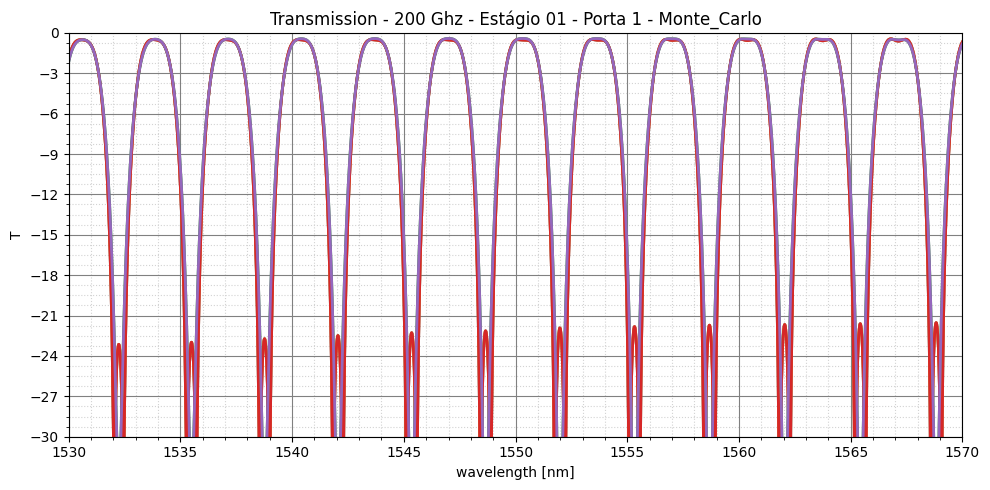

In [195]:
fig31 = plt.figure(figsize=(10,5))
ax31 = fig31.add_subplot(111)

plt.plot(wavelengths_1/nm, gain_db_1, linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 200 Ghz - Estágio 01 - Porta 1 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.show()

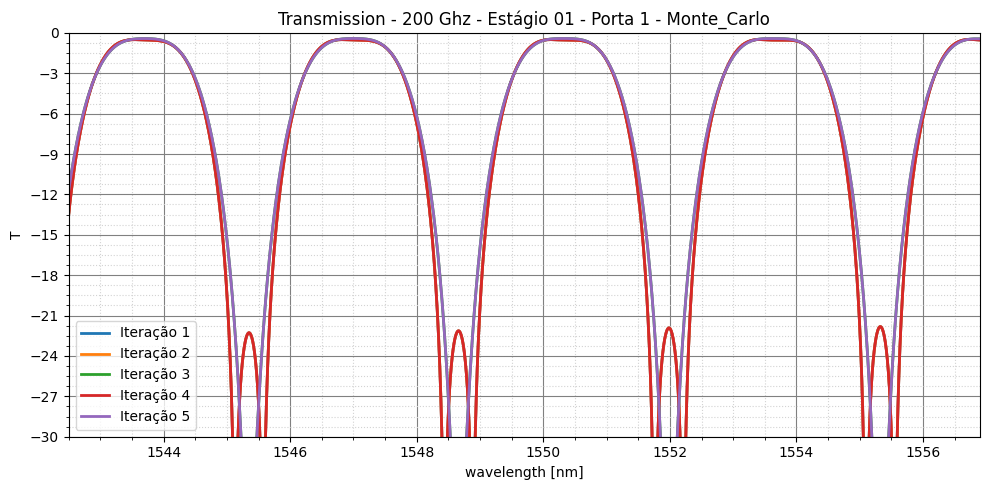

In [196]:
fig31 = plt.figure(figsize=(10,5))
ax31 = fig31.add_subplot(111)

for i in range (5):
    plt.plot(wavelengths_1/nm, gain_db_1[:,i], label = f'Iteração {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+12.5, (stop_wavelenth/nm)-30-13.1])
plt.ylim([-30, 0])
plt.title(r'Transmission - 200 Ghz - Estágio 01 - Porta 1 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))
plt.legend()
plt.minorticks_on()

plt.tight_layout()
plt.show()

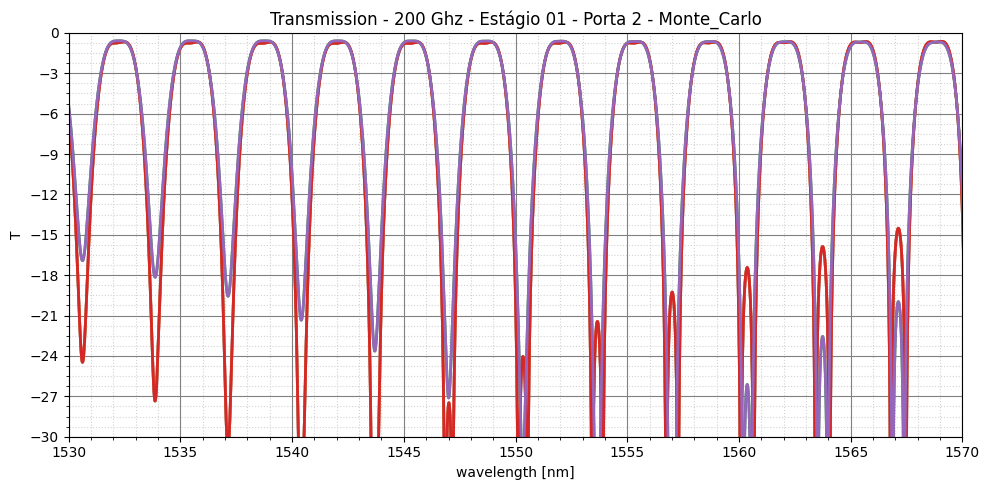

In [197]:
fig32 = plt.figure(figsize=(10,5))
ax32 = fig32.add_subplot(111)

plt.plot(wavelengths_2/nm, gain_db_2, linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 200 Ghz - Estágio 01 - Porta 2 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.show()

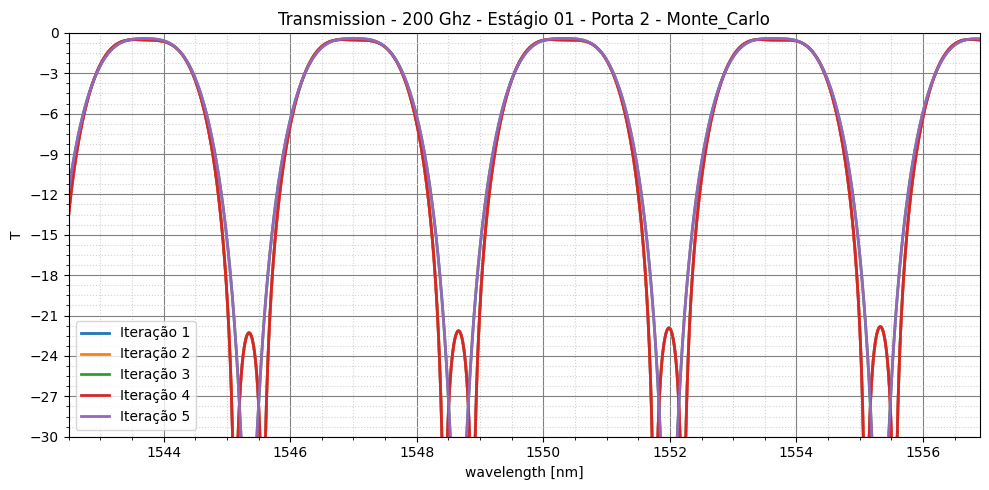

In [198]:
fig32 = plt.figure(figsize=(10,5))
ax32 = fig32.add_subplot(111)

for i in range (5):
    plt.plot(wavelengths_1/nm, gain_db_1[:,i], label = f'Iteração {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+12.5, (stop_wavelenth/nm)-30-13.1])
plt.ylim([-30, 0])
plt.title(r'Transmission - 200 Ghz - Estágio 01 - Porta 2 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))
plt.legend()
plt.minorticks_on()

plt.tight_layout()
plt.show()

In [110]:
MC_name = "MC_script_WG_200"
interApi.deletesweep(MC_name)

interApi.addsweep(2)

interApi.setsweep("Monte Carlo analysis", "name", MC_name)
interApi.setsweep(MC_name, "number of trials", 50)
interApi.setsweep(MC_name, "batch size", 50)
interApi.setsweep(MC_name, "enable seed", 1)
interApi.setsweep(MC_name, "seed", 1)
interApi.setsweep(MC_name, "Variation", "Both")

1.0

In [111]:
interApi.setsweep(MC_name, "type", "Parameters")

param1 = {
    "Name": "wg_1",
    "Parameter": "::Root Element::WGD_maior_1::wg_length",
    "Value": interApi.getnamed("WGD_maior_1", "wg_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.005*interApi.getnamed("WGD_maior_1", "wg_length")
    }
}

param2 = {
    "Name": "wg_2",
    "Parameter": "::Root Element::WGD_maior_2::wg_length",
    "Value": interApi.getnamed("WGD_maior_2", "wg_length"),
    "Distribution": {
        "type": "gaussian",
        "variation": 0.005*interApi.getnamed("WGD_maior_2", "wg_length")
    }
}

interApi.addsweepparameter(MC_name, param1)
interApi.addsweepparameter(MC_name, param2)

'wg_2'

In [112]:
result_gain_1 = {
    "Name": "gain_out_1",
    "Result": "::Root Element::ONA::input 1/mode 1/gain",
    "Estimation": True
}

result_gain_2 = {
    "Name": "gain_out_2",
    "Result": "::Root Element::ONA::input 2/mode 1/gain",
    "Estimation": True
}

interApi.addsweepresult(MC_name, result_gain_1)
interApi.addsweepresult(MC_name, result_gain_2)

'gain_out_2'

In [113]:
interApi.runsweep(MC_name)

In [115]:
histo_1 = pd.read_csv('Histograma_1_200.txt', skiprows=3, names=['wg_1', 'count'])
histo_2 = pd.read_csv('Histograma_2_200.txt', skiprows=3, names=['wg_2', 'count'])

valores_1 = histo_1['wg_1'].to_numpy()/um
count_1 = histo_1['count'].to_numpy()

valores_2 = histo_2['wg_2'].to_numpy()/um
count_2 = histo_2['count'].to_numpy()

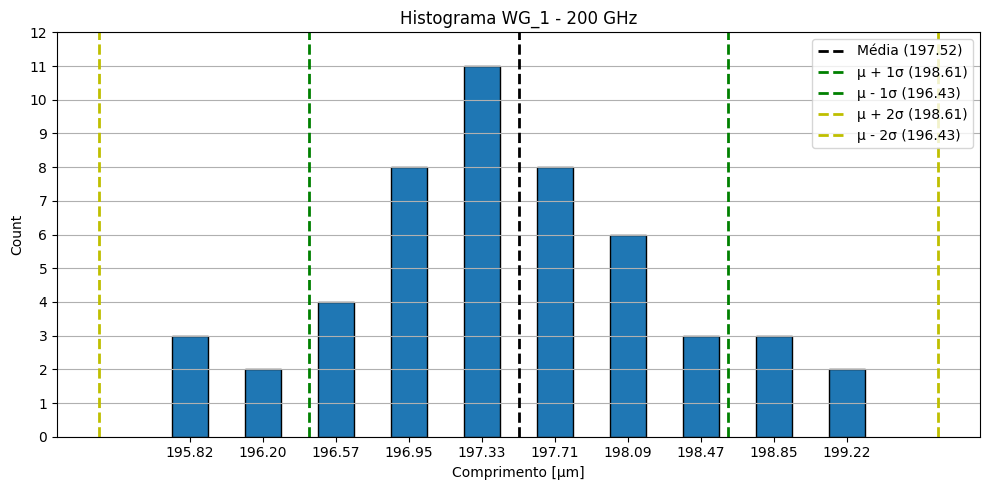

In [116]:
espacamento= np.min(np.diff(valores_1))*0.5

media = np.mean(valores_1)
desvio_padrao = np.std(valores_1)

plt.figure(figsize=(10, 5))
plt.bar(valores_1, count_1, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_1))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_1]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_1)+1,num=max(count_1)+2))
plt.ylabel('Count')
plt.title('Histograma WG_1 - 200 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

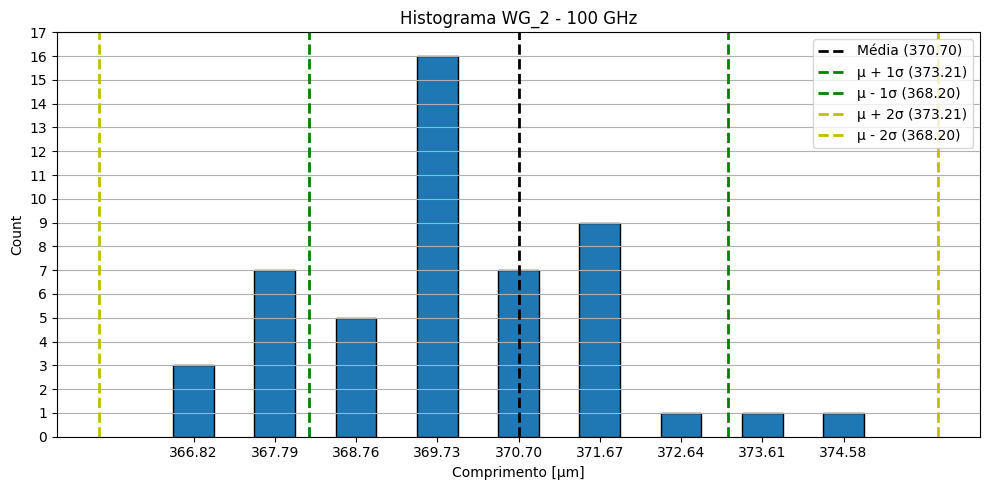

In [117]:
espacamento= np.min(np.diff(valores_2))*0.5

media = np.mean(valores_2)
desvio_padrao = np.std(valores_2)

plt.figure(figsize=(10, 5))
plt.bar(valores_2, count_2, width=espacamento, edgecolor='black')
plt.xlabel('Comprimento [μm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(valores_2))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f"{x:.2f}" for x in valores_2]))

plt.axvline(media, color='black', linestyle='dashed', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(media + desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ + 1σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - desvio_padrao, color='g', linestyle='dashed', linewidth=2, label=f"μ - 1σ ({(media-desvio_padrao):.2f})")

plt.axvline(media + 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ + 2σ ({(media+desvio_padrao):.2f})")
plt.axvline(media - 2*desvio_padrao, color='y', linestyle='dashed', linewidth=2, label=f"μ - 2σ ({(media-desvio_padrao):.2f})")

# plt.axvline(media + 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ + 3σ ({(media+desvio_padrao):.2f})")
# plt.axvline(media - 3*desvio_padrao, color='r', linestyle='dashed', linewidth=2, label=f"μ - 3σ ({(media-desvio_padrao):.2f})")

plt.legend()

plt.yticks(np.linspace(0,max(count_2)+1,num=max(count_2)+2))
plt.ylabel('Count')
plt.title('Histograma WG_2 - 100 GHz')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()

In [118]:
interApi.setsweep(MC_name, "number of trials", 5)
interApi.setsweep(MC_name, "batch size", 5)

1.0

In [119]:
interApi.runsweep(MC_name)

In [120]:
result_data_1 = interApi.getsweepresult(MC_name, "gain_out_1")
result_data_2 = interApi.getsweepresult(MC_name, "gain_out_2")

wavelengths_1 = result_data_1["wavelength"].flatten()
gain_db_1 = result_data_1["'TE' gain (dB)"]
wavelengths_2 = result_data_2["wavelength"].flatten()
gain_db_2 = result_data_2["'TE' gain (dB)"]

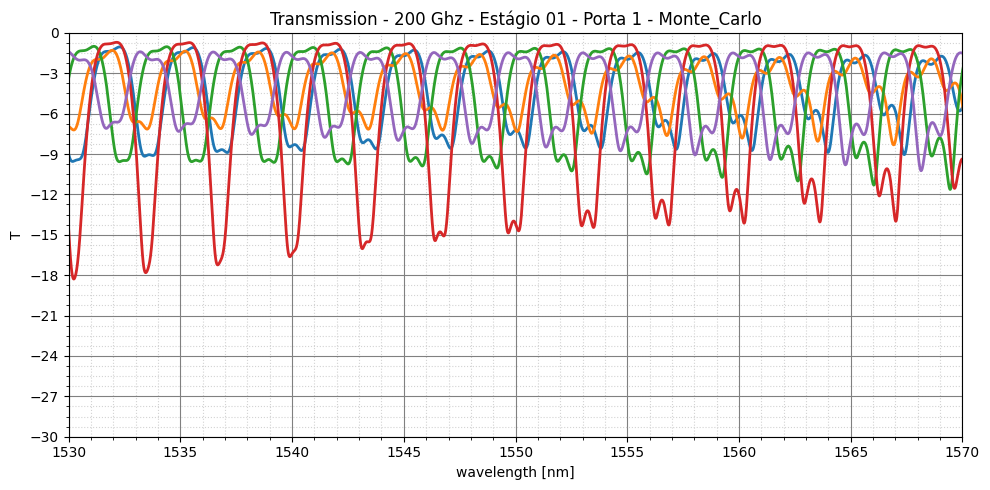

In [121]:
fig33 = plt.figure(figsize=(10,5))
ax33 = fig33.add_subplot(111)

plt.plot(wavelengths_2/nm, gain_db_2, linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 200 Ghz - Estágio 01 - Porta 1 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.show()

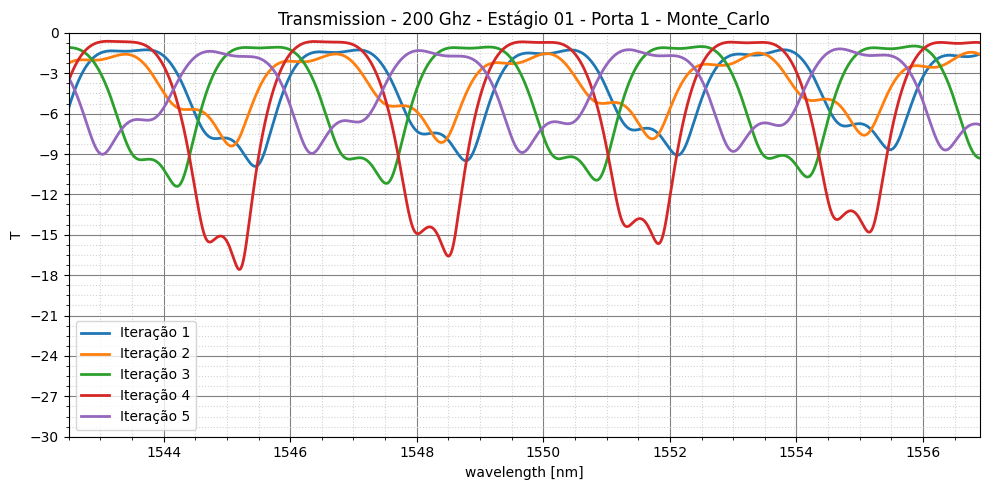

In [122]:
fig33 = plt.figure(figsize=(10,5))
ax33 = fig33.add_subplot(111)

for i in range (5):
    plt.plot(wavelengths_1/nm, gain_db_1[:,i], label = f'Iteração {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+12.5, (stop_wavelenth/nm)-30-13.1])
plt.ylim([-30, 0])
plt.title(r'Transmission - 200 Ghz - Estágio 01 - Porta 1 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))
plt.legend()
plt.minorticks_on()

plt.tight_layout()
plt.show()

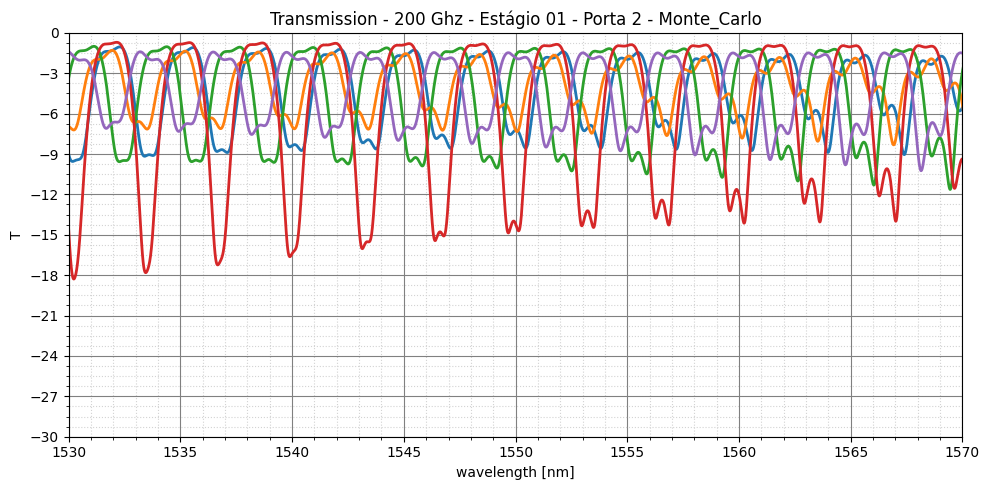

In [123]:
fig34 = plt.figure(figsize=(10,5))
ax34 = fig34.add_subplot(111)

plt.plot(wavelengths_2/nm, gain_db_2, linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30, (stop_wavelenth/nm)-30])
plt.ylim([-30, 0])
plt.title(r'Transmission - 200 Ghz - Estágio 01 - Porta 2 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))

plt.minorticks_on()

plt.tight_layout()
plt.show()

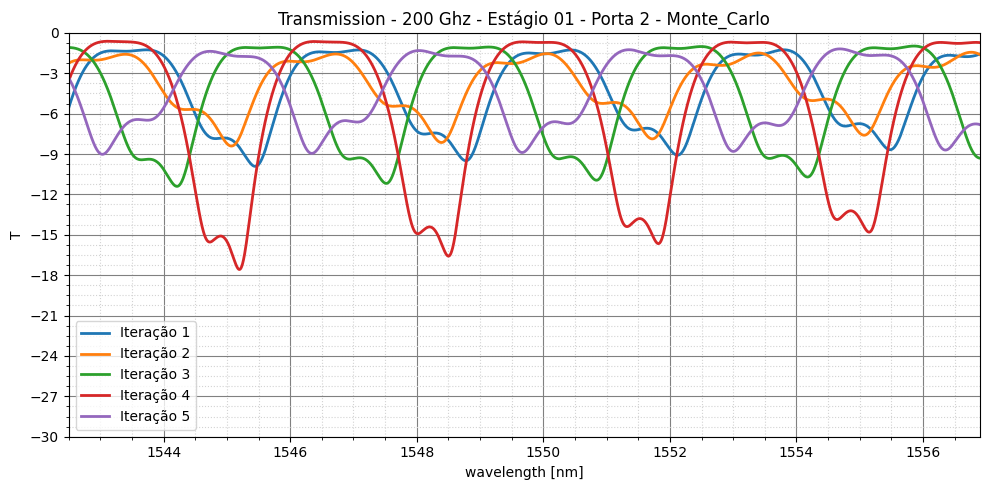

In [125]:
fig34 = plt.figure(figsize=(10,5))
ax34 = fig34.add_subplot(111)

for i in range (5):
    plt.plot(wavelengths_1/nm, gain_db_1[:,i], label = f'Iteração {i+1}', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([(start_wavelenth/nm)+30+12.5, (stop_wavelenth/nm)-30-13.1])
plt.ylim([-30, 0])
plt.title(r'Transmission - 200 Ghz - Estágio 01 - Porta 2 - Monte_Carlo')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-30, 0.01, 3))
plt.legend()
plt.minorticks_on()

plt.tight_layout()
plt.show()